# Importing and cleaning data

## Webcraping data

#### Defining functions for webscraping

In [8]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import pandas as pd
import numpy as np
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup

# Takes url as input and turn into soup
def getSoup(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    return soup

# Finding index of lowest and highest rated user reviews
def minMax(a):

    # get the index of least rated user review
    min([], default="EMPTY")
    minpos = a.index(min(a))
    
    # get the index of highest rated user review
    maxpos = a.index(max(a)) 
    return minpos, maxpos

# Based on the soup input, return review link
def getReviews(soup):

    # get a list of user ratings
    user_review_ratings = [tag.previous_element for tag in 
                           soup.find_all('span', attrs={'class': 'point-scale'})]
    
    
    # find the index of negative and positive review
    n_index, p_index = minMax(list(map(int, user_review_ratings)))
    
    
    # get the review tags
    user_review_list = soup.find_all('a', attrs={'class':'title'})
    
    
    # get the negative and positive review tags
    n_review_tag = user_review_list[n_index]
    p_review_tag = user_review_list[p_index]
    
    # return the negative and positive review link
    n_review_link = "https://www.imdb.com" + n_review_tag['href']
    p_review_link = "https://www.imdb.com" + p_review_tag['href']
    
    return n_review_link, p_review_link

# Returns user review with url
def getReviewText(review_url):
    
    # get the review_url's soup
    soup = getSoup(review_url)
    
    # find div tags with class text show-more__control
    tag = soup.find('div', attrs={'class': 'text show-more__control'})
    
    return tag.getText()

# Returns user review with url
def getReviewDate(review_url):
    
    # get the review_url's soup
    soup = getSoup(review_url)
    
    # find span tags with class review-date
    tag = soup.find('span', attrs={'class': 'review-date'})
    
    return tag.getText()

# Returns movieTitle with given URL
def getMovieTitle(review_url):

    # get the review_url's soup
    soup = getSoup(review_url)
    
    # find h1 tag
    tag = soup.find('h1')
    
    return list(tag.children)[1].getText()

pd.options.display.max_colwidth=500

#### Initiating url with BeautifulSoup

In [ ]:
# Filter out movies that are at least 6 ratings, at least 50,000 votes, Action genre, Top 100 
ActionURL = '''https://www.imdb.com/search/title/?title_type=feature&user_rating=6.0,10.0
&num_votes=50000,&genres=action&view=simple&sort=user_rating,desc&count=250'''
HorrorURL = '''https://www.imdb.com/search/title/?title_type=feature&user_rating=6.0,10.0
&num_votes=50000,&genres=horror&view=simple&sort=user_rating,desc&count=250'''
ComedyURL = '''https://www.imdb.com/search/title/?title_type=feature&user_rating=6.0,10.0
&num_votes=50000,&genres=comedy&view=simple&sort=user_rating,desc&count=250'''
RomanceURL = '''https://www.imdb.com/search/title/?title_type=feature&user_rating=6.0,10.0
&num_votes=50000,&genres=romance&view=simple&sort=user_rating,desc&count=250'''
SciFiURL = '''https://www.imdb.com/search/title/?title_type=feature&user_rating=6.0,10.0
&num_votes=50000,&genres=sci-fi&view=simple&sort=user_rating,desc&count=250'''

# get the soup object for main api url
URL_A = ActionURL.replace("\n","")
URL_H = HorrorURL.replace("\n","")
URL_C = ComedyURL.replace("\n","")
URL_R = RomanceURL.replace("\n","")
URL_S = SciFiURL.replace("\n","")

soup_A = BeautifulSoup(urlopen(URL_A))
soup_H = BeautifulSoup(urlopen(URL_H))
soup_C = BeautifulSoup(urlopen(URL_C))
soup_R = BeautifulSoup(urlopen(URL_R))
soup_S = BeautifulSoup(urlopen(URL_S))

# find all a-tags with class:None
movie_tags_A = soup_A.find_all('a', attrs={'class': None})
movie_tags_H = soup_H.find_all('a', attrs={'class': None})
movie_tags_C = soup_C.find_all('a', attrs={'class': None})
movie_tags_R = soup_R.find_all('a', attrs={'class': None})
movie_tags_S = soup_S.find_all('a', attrs={'class': None})

# filter the a-tags to get just the titles
movie_tags_A = [tag.attrs['href'] for tag in movie_tags_A 
              if tag.attrs['href'].startswith('/title') & tag.attrs['href'].endswith('/')]
movie_tags_H = [tag.attrs['href'] for tag in movie_tags_H 
              if tag.attrs['href'].startswith('/title') & tag.attrs['href'].endswith('/')]
movie_tags_C = [tag.attrs['href'] for tag in movie_tags_C 
              if tag.attrs['href'].startswith('/title') & tag.attrs['href'].endswith('/')]
movie_tags_R = [tag.attrs['href'] for tag in movie_tags_R 
              if tag.attrs['href'].startswith('/title') & tag.attrs['href'].endswith('/')]
movie_tags_S = [tag.attrs['href'] for tag in movie_tags_S
              if tag.attrs['href'].startswith('/title') & tag.attrs['href'].endswith('/')]

# remove duplicate links
movie_tags_A = list(dict.fromkeys(movie_tags_A))
movie_tags_H = list(dict.fromkeys(movie_tags_H))
movie_tags_C = list(dict.fromkeys(movie_tags_C))
movie_tags_R = list(dict.fromkeys(movie_tags_R))
movie_tags_S = list(dict.fromkeys(movie_tags_S))

print("There are a total of " + str(len(movie_tags_A)+len(movie_tags_H)+len(movie_tags_C)+len(movie_tags_R)+len(movie_tags_S)) + " movie titles")
print("Displaying 10 titles")
movie_tags=movie_tags_A+movie_tags_H+movie_tags_C+movie_tags_R+movie_tags_S
movie_tags[:10]

There are a total of 1250 movie titles
Displaying 10 titles


['/title/tt0468569/',
 '/title/tt0167260/',
 '/title/tt1375666/',
 '/title/tt0120737/',
 '/title/tt5813916/',
 '/title/tt0167261/',
 '/title/tt0133093/',
 '/title/tt0080684/',
 '/title/tt0076759/',
 '/title/tt0047478/']

In [ ]:
# movie links
base_url = "https://www.imdb.com"
movie_links = [base_url + tag + 'reviews' for tag in movie_tags]
print("There are a total of " + str(len(movie_links)) + " movie user reviews")
print("Displaying 10 user reviews links")
movie_links[:10]

There are a total of 1250 movie user reviews
Displaying 10 user reviews links


['https://www.imdb.com/title/tt0468569/reviews',
 'https://www.imdb.com/title/tt0167260/reviews',
 'https://www.imdb.com/title/tt1375666/reviews',
 'https://www.imdb.com/title/tt0120737/reviews',
 'https://www.imdb.com/title/tt5813916/reviews',
 'https://www.imdb.com/title/tt0167261/reviews',
 'https://www.imdb.com/title/tt0133093/reviews',
 'https://www.imdb.com/title/tt0080684/reviews',
 'https://www.imdb.com/title/tt0076759/reviews',
 'https://www.imdb.com/title/tt0047478/reviews']

In [ ]:
# get a list of soup objects
movie_soups = [getSoup(link) for link in movie_links]

# get all 1250 movie review links
movie_review_list = [getReviews(movie_soup) for movie_soup in movie_soups]

movie_review_list = list(itertools.chain(*movie_review_list))
print(len(movie_review_list))

print("There are a total of " + str(len(movie_review_list)) + " individual movie reviews")
print("Displaying 10 reviews")
movie_review_list[:10]

2500
There are a total of 2500 individual movie reviews
Displaying 10 reviews


['https://www.imdb.com/review/rw6475511/',
 'https://www.imdb.com/review/rw6467314/',
 'https://www.imdb.com/review/rw1772667/',
 'https://www.imdb.com/review/rw3379367/',
 'https://www.imdb.com/review/rw2285156/',
 'https://www.imdb.com/review/rw4692192/',
 'https://www.imdb.com/review/rw0460052/',
 'https://www.imdb.com/review/rw0460052/',
 'https://www.imdb.com/review/rw3579738/',
 'https://www.imdb.com/review/rw3575367/']

In [ ]:
# Get movie name from the review link
movie_titles = [getMovieTitle(url) for url in movie_review_list]

# Assigning movie genre of Horror, Comedy, Action, Romance and Sci-Fi
movie_genre=["Action"]*500+["Horror"]*500+["Comedy"]*500+["Romance"]*500+["Sci-Fi"]*500

# Get review_date from the review link
review_date = [getReviewDate(url) for url in movie_review_list]

# Get review text from the review link
review_texts = [getReviewText(url) for url in movie_review_list]

# Label each review with negative or positive
review_sentiment = np.array(['negative', 'positive'] * (len(movie_review_list)//2))

# construct a dataframe
df = pd.DataFrame({'Movie': movie_titles, 'Genre': movie_genre,'User_review': review_texts,'Review_date': review_date,'Sentiment': review_sentiment})

#### Raw Data frame check

In [ ]:
df.head()

Movie  ... Sentiment
0                                The Dark Knight  ...  negative
1                                The Dark Knight  ...  positive
2  The Lord of the Rings: The Return of the King  ...  negative
3  The Lord of the Rings: The Return of the King  ...  positive
4                                      Inception  ...  negative

[5 rows x 5 columns]

### Pickling Raw data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import pandas as pd

pickle_out=open('/content/drive/MyDrive/Colab_Notebooks/Capstone_Project/'+"df",'wb')
pickle.dump(df,pickle_out)
pickle_out.close()

In [15]:
import pickle
import pandas as pd

pickle_in=open('/content/drive/MyDrive/Colab_Notebooks/Capstone_Project/'+"RawDF",'rb')
RawDF=pd.read_pickle(pickle_in)
RawDF.head()

Movie  ... Sentiment
0                                The Dark Knight  ...  negative
1                                The Dark Knight  ...  positive
2  The Lord of the Rings: The Return of the King  ...  negative
3  The Lord of the Rings: The Return of the King  ...  positive
4                                      Inception  ...  negative

[5 rows x 5 columns]

## Cleaning data

### Expanding contractions

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [ ]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [ ]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
RawDF['Review']=RawDF['User_review'].apply(lambda x:expand_contractions(x))

### Lowercase and Removing special characters

In [ ]:
# Removing any extra spaces included in words

RawDF['Simplified'] = RawDF['Review'].apply(lambda x: x.lower())
RawDF['Simplified'] = RawDF['Simplified'].apply(lambda x: re.sub('\w*\d\w*','',x))
RawDF['Simplified'] = RawDF['Simplified'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
RawDF['Simplified'] = RawDF['Simplified'].apply(lambda x: re.sub(' +',' ',x))
RawDF['Simplified'] = RawDF['Simplified'].apply(lambda x: re.sub('br','',x)) # Remove 'br' from each review
RawDF['Simplified'] = RawDF['Simplified'].apply(lambda x: re.sub('movie','',x))
RawDF['Simplified'] = RawDF['Simplified'].apply(lambda x: re.sub('\n','',x))

In [ ]:
for index,text in enumerate(RawDF['Simplified'][1:4]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 best  ever heath ledger is work is phenomenal no words
Review 2:
 just as peter jackson felt that lotr had to be made as one large threepart cinematic piece i decided to write my imdb review of all three s as a single multipart essay click on my screenname and hit chronological to view my reviews of the fellowship and two towers i make no guarantees about the quality and consistence of my review but i do guarantee that these three films offer very high and very consistent quality from beginning to end the acting cinematography art and direction simply can not be beatwhich of the three s is my favorite varies with my mood  and the same holds true for tolkien is books when i am immersed in the story rotk is my favorite when i simply want to have fun with the whole experience i love fellowship and when i want something intense evocative and thoughtful i go for the two towersfrodo sam and golem are on their way to mount doom and their bodies nerves and relationships have borne 

### Tokenization

In [ ]:
import nltk
nltk.download('punkt')
RawDF['Tokenized'] = RawDF['Simplified'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Stop words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
stop_words = set(stopwords.words('english'))
RawDF['Stopwords_removed'] = RawDF['Tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
RawDF.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Movie  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Stopwords_removed
0                                The Dark Knight  ...  [level, enjoymenttop, tier, start, finish, dark, knight, edge, seat, enjoying, every, minutelikelihood, recommendhighest, recommendation, seen, watch, masterpiece, downside, likely, put, future, batman, features, shamequality, actingexcellent, bale, gold, standard, batman, gruff, tough, aloof, positively, fueled, tragedies, dark, past, ledger, nightmare, villain, twisted, evil, unapologetic, irrational, completely, void, moral, compassquality, writingperfection, one, wish, could, memory, edi...
1                                The Dark Knight  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [best, ever, heath, ledger, work, phenomenal, words]
2  The Lord of the Rings: The Return of the King  ...  [peter, jackson, felt, lotr, made, one, large, threepart, cinematic, piece, decided, write, imdb, review, three, single, multipart, essay, click, screenname, hit, chronological, view, reviews, fellowship, two, towers, make, guarantees, quality, consistence, review, guarantee, three, films, offer, high, consistent, quality, beginning, end, acting, cinematography, art, direction, simply, beatwhich, three, favorite, varies, mood, , holds, true, tolkien, books, immersed, story, rotk, favorite, ...
3  The Lord of the Rings: The Return of the King  ...                                                                                                                 [rewatched, lord, rings, trilogy, time, tonight, nearly, years, since, fellowship, rings, released, still, seen, better, close, three, films, casting, perfection, well, incredible, acting, everyone, still, watch, back, back, get, bored, light, world, would, without, themi, miss, good, old, lotr, days, best, ever, created, return, king, best, way, end, thrilling, journey, middle, earth]
4                                      Inception  ...  [central, idea, inception, interesting, one, technology, exists, enter, people, dreams, order, steal, private, secrets, implant, new, ideas, christopher, nolan, memento, fame, writer, director, smart, compelling, unfortunately, inception, bloated, failurethe, root, problem, nolan, replaces, fascinating, surrealism, dream, worlds, lengthy, outtakes, james, bond, example, early, film, cobb, ariadne, sitting, café, dream, world, cobb, tells, ariadne, stay, calm, going, happen, waiter, going, in...

[5 rows x 9 columns]

### POS Tags

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
RawDF['Pos_tags'] = RawDF['Stopwords_removed'].apply(nltk.tag.pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
import nltk
nltk.download('wordnet')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
RawDF['Wordnet_pos'] = RawDF['Pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
RawDF.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Movie  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Wordnet_pos
0                                The Dark Knight  ...  [(level, n), (enjoymenttop, r), (tier, a), (start, v), (finish, a), (dark, n), (knight, v), (edge, a), (seat, n), (enjoying, v), (every, n), (minutelikelihood, n), (recommendhighest, a), (recommendation, n), (seen, v), (watch, n), (masterpiece, n), (downside, v), (likely, r), (put, a), (future, a), (batman, n), (features, v), (shamequality, a), (actingexcellent, a), (bale, n), (gold, n), (standard, n), (batman, n), (gruff, v), (tough, a), (aloof, n), (positively, r), (fueled, v), (tragedies,...
1                                The Dark Knight  ...                                                                                                                                                                                                                                                                                                                                                                                                                              [(best, a), (ever, r), (heath, n), (ledger, n), (work, n), (phenomenal, a), (words, n)]
2  The Lord of the Rings: The Return of the King  ...  [(peter, n), (jackson, n), (felt, v), (lotr, a), (made, v), (one, n), (large, a), (threepart, n), (cinematic, a), (piece, n), (decided, v), (write, a), (imdb, n), (review, n), (three, n), (single, a), (multipart, n), (essay, v), (click, n), (screenname, n), (hit, v), (chronological, a), (view, n), (reviews, n), (fellowship, v), (two, n), (towers, n), (make, v), (guarantees, n), (quality, a), (consistence, n), (review, n), (guarantee, n), (three, n), (films, n), (offer, v), (high, a), (consis...
3  The Lord of the Rings: The Return of the King  ...  [(rewatched, v), (lord, a), (rings, n), (trilogy, n), (time, n), (tonight, v), (nearly, r), (years, n), (since, n), (fellowship, n), (rings, n), (released, v), (still, r), (seen, v), (better, r), (close, a), (three, n), (films, n), (casting, v), (perfection, n), (well, r), (incredible, a), (acting, v), (everyone, n), (still, r), (watch, v), (back, r), (back, r), (get, n), (bored, v), (light, a), (world, n), (would, n), (without, n), (themi, v), (miss, a), (good, a), (old, a), (lotr, n), (day...
4                                      Inception  ...  [(central, a), (idea, n), (inception, n), (interesting, v), (one, n), (technology, n), (exists, v), (enter, v), (people, n), (dreams, n), (order, n), (steal, a), (private, a), (secrets, n), (implant, v), (new, a), (ideas, n), (christopher, v), (nolan, a), (memento, n), (fame, a), (writer, n), (director, n), (smart, a), (compelling, n), (unfortunately, a), (inception, n), (bloated, v), (failurethe, a), (root, n), (problem, n), (nolan, n), (replaces, v), (fascinating, v), (surrealism, n), (dre...

[5 rows x 11 columns]

In [ ]:
wnl = WordNetLemmatizer()
RawDF['Lemmatized'] = RawDF['Wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
RawDF.head()

Movie  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Lemmatized
0                                The Dark Knight  ...  [level, enjoymenttop, tier, start, finish, dark, knight, edge, seat, enjoy, every, minutelikelihood, recommendhighest, recommendation, see, watch, masterpiece, downside, likely, put, future, batman, feature, shamequality, actingexcellent, bale, gold, standard, batman, gruff, tough, aloof, positively, fuel, tragedy, dark, past, ledger, nightmare, villain, twisted, evil, unapologetic, irrational, completely, void, moral, compassquality, writingperfection, one, wish, could, memory, edit, order,...
1                                The Dark Knight  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                  [best, ever, heath, ledger, work, phenomenal, word]
2  The Lord of the Rings: The Return of the King  ...  [peter, jackson, felt, lotr, make, one, large, threepart, cinematic, piece, decide, write, imdb, review, three, single, multipart, essay, click, screenname, hit, chronological, view, review, fellowship, two, tower, make, guarantee, quality, consistence, review, guarantee, three, film, offer, high, consistent, quality, begin, end, act, cinematography, art, direction, simply, beatwhich, three, favorite, varies, mood, , hold, true, tolkien, book, immerse, story, rotk, favorite, simply, want, f...
3  The Lord of the Rings: The Return of the King  ...                                                                                                                                     [rewatched, lord, ring, trilogy, time, tonight, nearly, year, since, fellowship, ring, release, still, see, well, close, three, film, cast, perfection, well, incredible, act, everyone, still, watch, back, back, get, bore, light, world, would, without, themi, miss, good, old, lotr, day, best, ever, create, return, king, best, way, end, thrill, journey, middle, earth]
4                                      Inception  ...  [central, idea, inception, interest, one, technology, exist, enter, people, dream, order, steal, private, secret, implant, new, idea, christopher, nolan, memento, fame, writer, director, smart, compelling, unfortunately, inception, bloat, failurethe, root, problem, nolan, replace, fascinate, surrealism, dream, world, lengthy, outtake, james, bond, example, early, film, cobb, ariadne, sit, café, dream, world, cobb, tell, ariadne, stay, calm, go, happen, waiter, go, ing, glass, full, wriggling...

[5 rows x 12 columns]

### Adjectives

In [ ]:
RawDF['Adjective']=RawDF['Wordnet_pos'].apply(lambda x: [(word) for (word, tag) in x if tag=='a'])
RawDF['Adjective_str'] = [' '.join(map(str,l)) for l in RawDF['Adjective']]
RawDF.head()

Movie  ...                                                                                                                                                                                                                                                                                                                                                                                      Adjective_str
0                                The Dark Knight  ...                                                                                                                                                                                                           tier finish edge recommendhighest put future shamequality actingexcellent tough dark past twisted evil unapologetic void moral edit intangiblesexcellent visual gloomy good next intense
1                                The Dark Knight  ...                                                                                                                                                                                                                                                                                                                                                                                    best phenomenal
2  The Lord of the Rings: The Return of the King  ...  lotr large cinematic write single chronological quality high consistent art beatwhich favorite  true want whole intense evocative thoughtful golem greatest middle deadly last entire previous filmsthe major classic able guess fatalistic unpredictable tolkien grand present major tolkien subtle previous simple consistent tolkien better lengthy changed early important least illustrated
3  The Lord of the Rings: The Return of the King  ...                                                                                                                                                                                                                                                                                                                                              lord close incredible light miss good old best middle
4                                      Inception  ...                                                                                                                                                                             central steal private new nolan fame smart unfortunately failurethe lengthy early café ariadne happen full best high lincoln whole special endless poor substitute imaginative higher deeper bad special best onetenth

[5 rows x 14 columns]

### Sentiment polarity using `Textblob`

In [ ]:
RawDF['Lemma_str'] = [' '.join(map(str,l)) for l in RawDF['Lemmatized']]
RawDF.head()

Movie  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Lemma_str
0                                The Dark Knight  ...  level enjoymenttop tier start finish dark knight edge seat enjoy every minutelikelihood recommendhighest recommendation see watch masterpiece downside likely put future batman feature shamequality actingexcellent bale gold standard batman gruff tough aloof positively fuel tragedy dark past ledger nightmare villain twisted evil unapologetic irrational completely void moral compassquality writingperfection one wish could memory edit order watch againquality intangiblesexcellent visual point da...
1                                The Dark Knight  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                          best ever heath ledger work phenomenal word
2  The Lord of the Rings: The Return of the King  ...  peter jackson felt lotr make one large threepart cinematic piece decide write imdb review three single multipart essay click screenname hit chronological view review fellowship two tower make guarantee quality consistence review guarantee three film offer high consistent quality begin end act cinematography art direction simply beatwhich three favorite varies mood  hold true tolkien book immerse story rotk favorite simply want fun whole experience love fellowship want something intense evoc...
3  The Lord of the Rings: The Return of the King  ...                                                                                                                                                                                          rewatched lord ring trilogy time tonight nearly year since fellowship ring release still see well close three film cast perfection well incredible act everyone still watch back back get bore light world would without themi miss good old lotr day best ever create return king best way end thrill journey middle earth
4                                      Inception  ...  central idea inception interest one technology exist enter people dream order steal private secret implant new idea christopher nolan memento fame writer director smart compelling unfortunately inception bloat failurethe root problem nolan replace fascinate surrealism dream world lengthy outtake james bond example early film cobb ariadne sit café dream world cobb tell ariadne stay calm go happen waiter go ing glass full wriggling eyeball go turn around see best friend high school sex aaham l...

[5 rows x 15 columns]

In [ ]:
RawDF['Sentiment_score'] = RawDF['Lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
RawDF.head()

Movie  ... Sentiment_score
0                                The Dark Knight  ...        0.021919
1                                The Dark Knight  ...        0.750000
2  The Lord of the Rings: The Return of the King  ...        0.189085
3  The Lord of the Rings: The Return of the King  ...        0.420000
4                                      Inception  ...        0.126163

[5 rows x 16 columns]

### Subjectivity score

In [ ]:
RawDF['Subjectivity_score'] = RawDF['Lemma_str'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
RawDF.head()

Movie  ... Subjectivity_score
0                                The Dark Knight  ...           0.505189
1                                The Dark Knight  ...           0.400000
2  The Lord of the Rings: The Return of the King  ...           0.500929
3  The Lord of the Rings: The Return of the King  ...           0.340000
4                                      Inception  ...           0.479720

[5 rows x 17 columns]

### Pickling Clean data

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import pandas as pd

pickle_out=open('/content/drive/MyDrive/Colab_Notebooks/Capstone_Project/'+"CleanDF",'wb')
pickle.dump(RawDF,pickle_out)
pickle_out.close()

In [33]:
import pickle
import pandas as pd

pickle_in=open('/content/drive/MyDrive/Colab_Notebooks/Capstone_Project/'+"CleanDF",'rb')
CleanDF=pd.read_pickle(pickle_in)
CleanDF['Lemma_str'] = CleanDF['Lemma_str'].str.replace('one', '')
CleanDF['Lemma_str'] = CleanDF['Lemma_str'].str.replace('two', '')
CleanDF['Lemma_str'] = CleanDF['Lemma_str'].str.replace('three', '')
CleanDF.head()

Movie  ... Subjectivity_score
0                                The Dark Knight  ...           0.505189
1                                The Dark Knight  ...           0.400000
2  The Lord of the Rings: The Return of the King  ...           0.500929
3  The Lord of the Rings: The Return of the King  ...           0.340000
4                                      Inception  ...           0.479720

[5 rows x 17 columns]

# EDA

## General EDA

### Sentiment Distribution

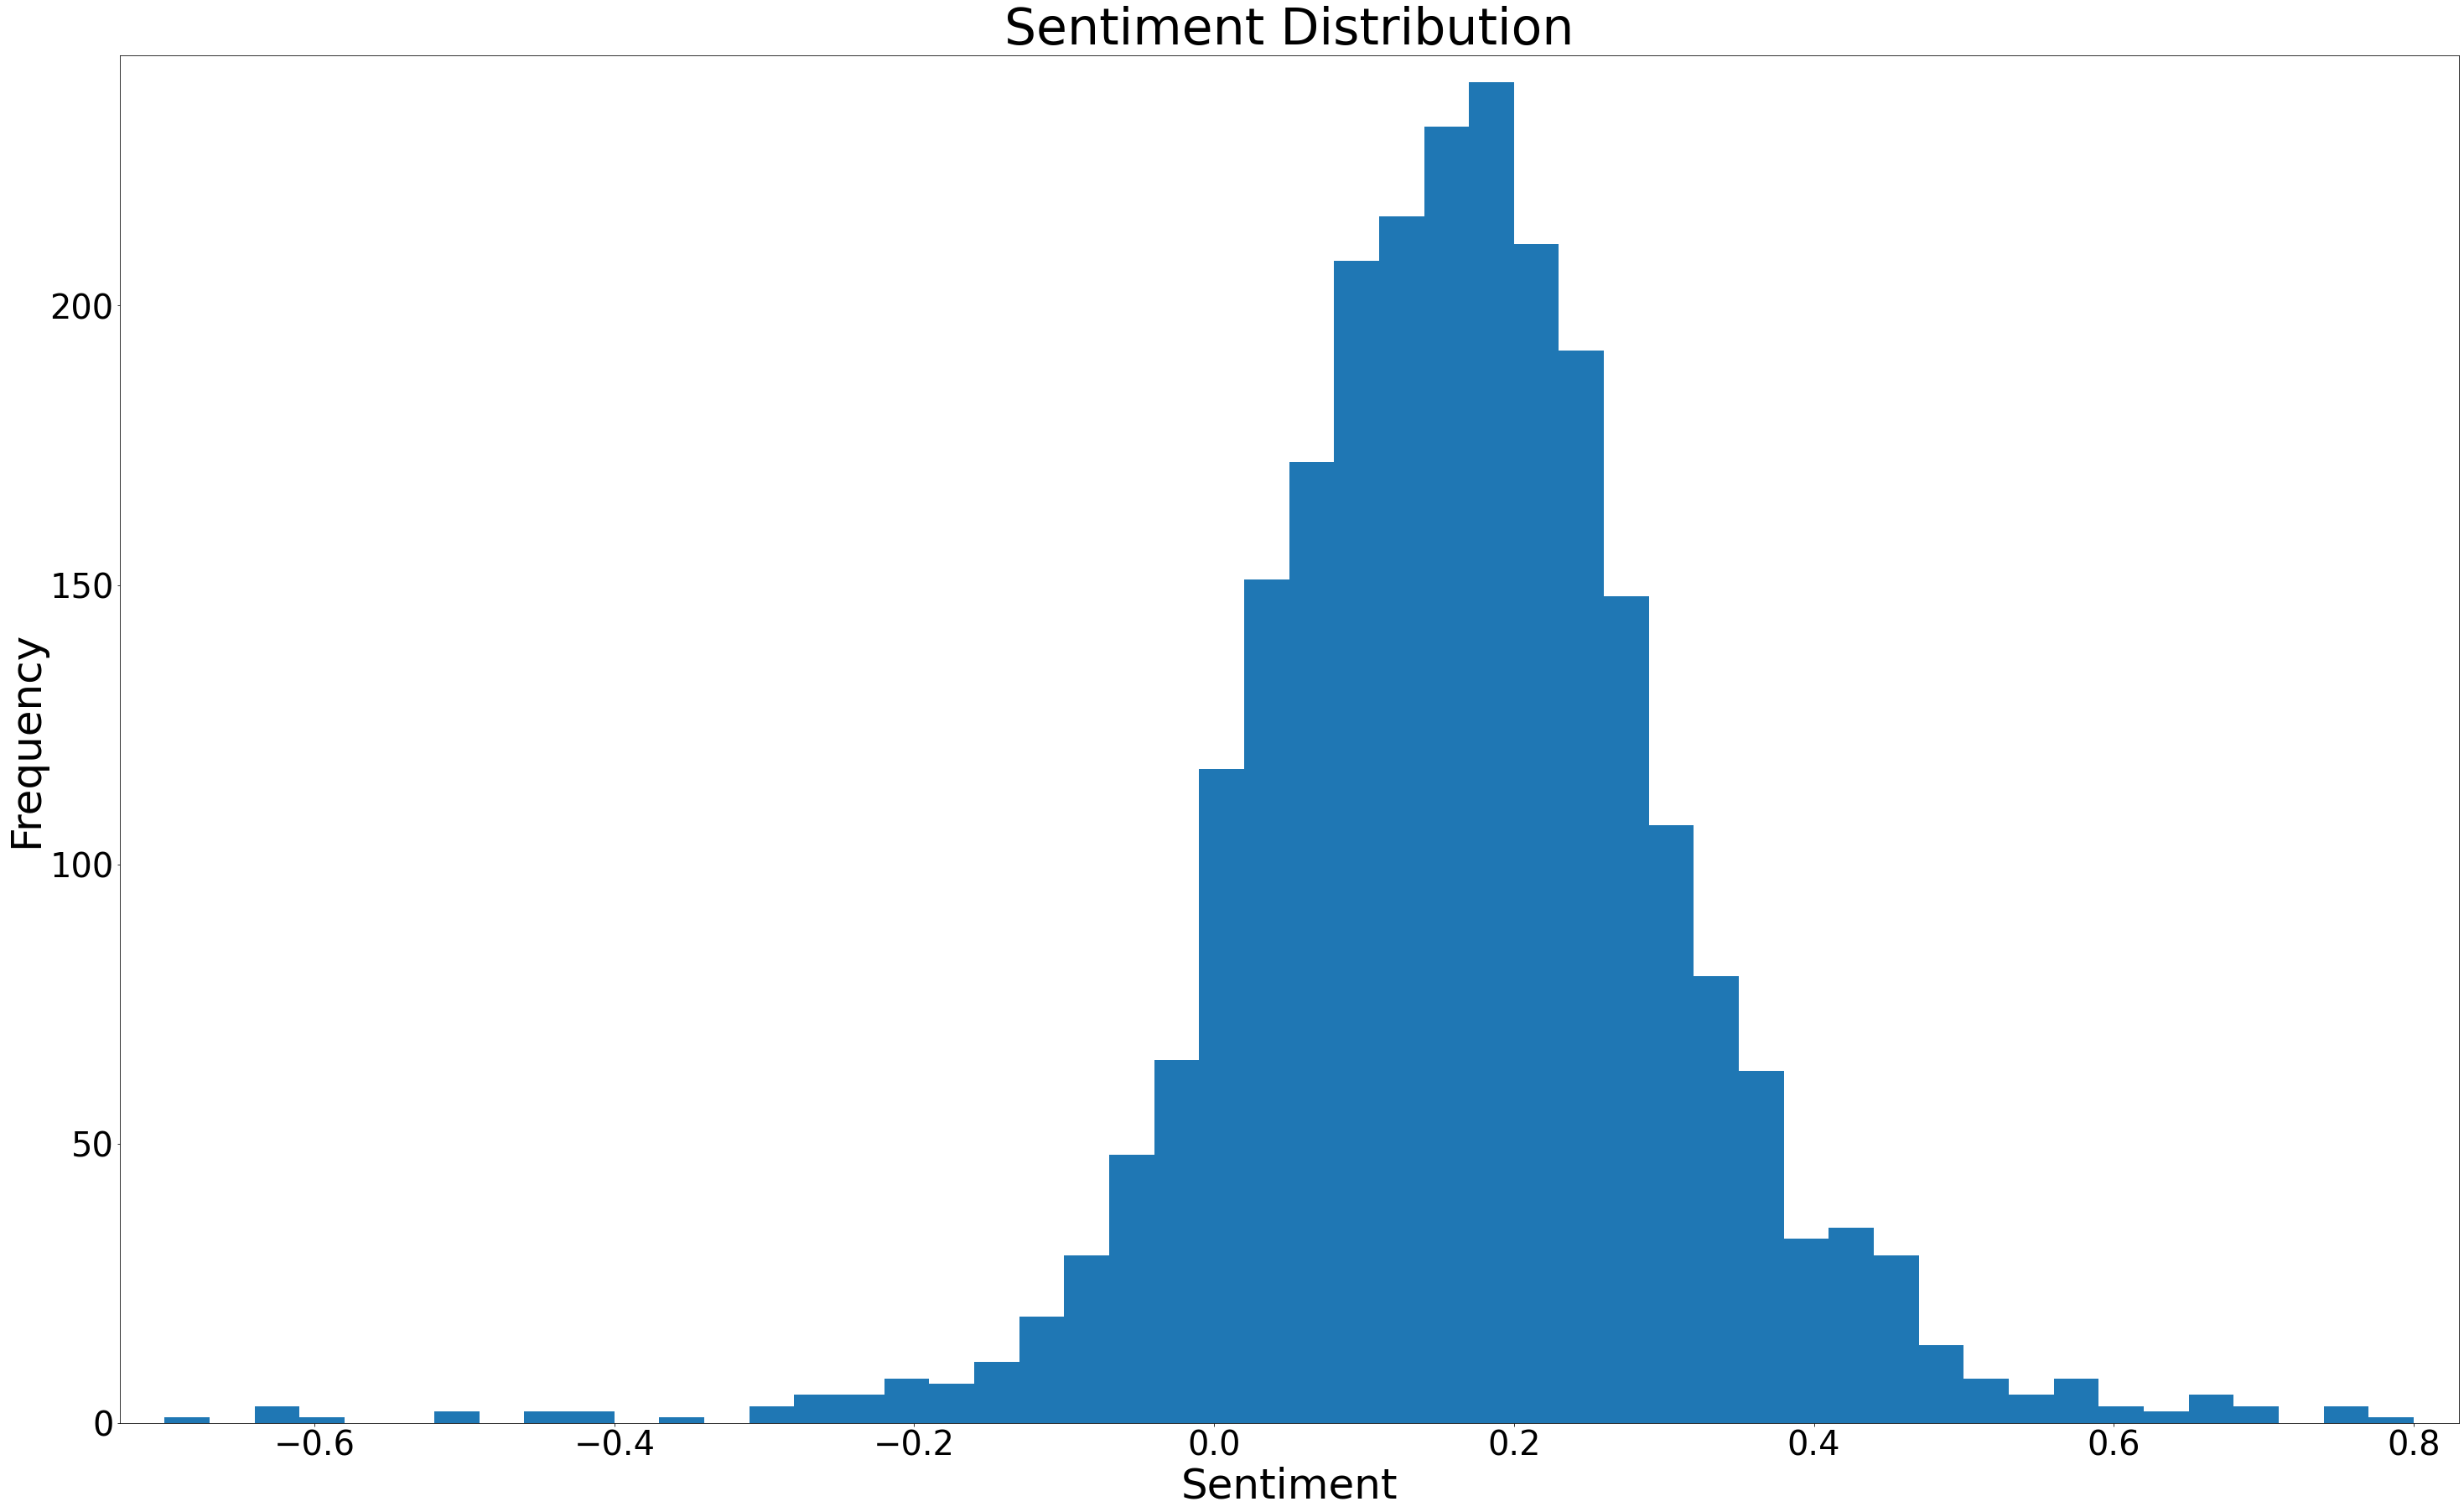

In [ ]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(CleanDF['Sentiment_score'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

### Subjectivity Distribution

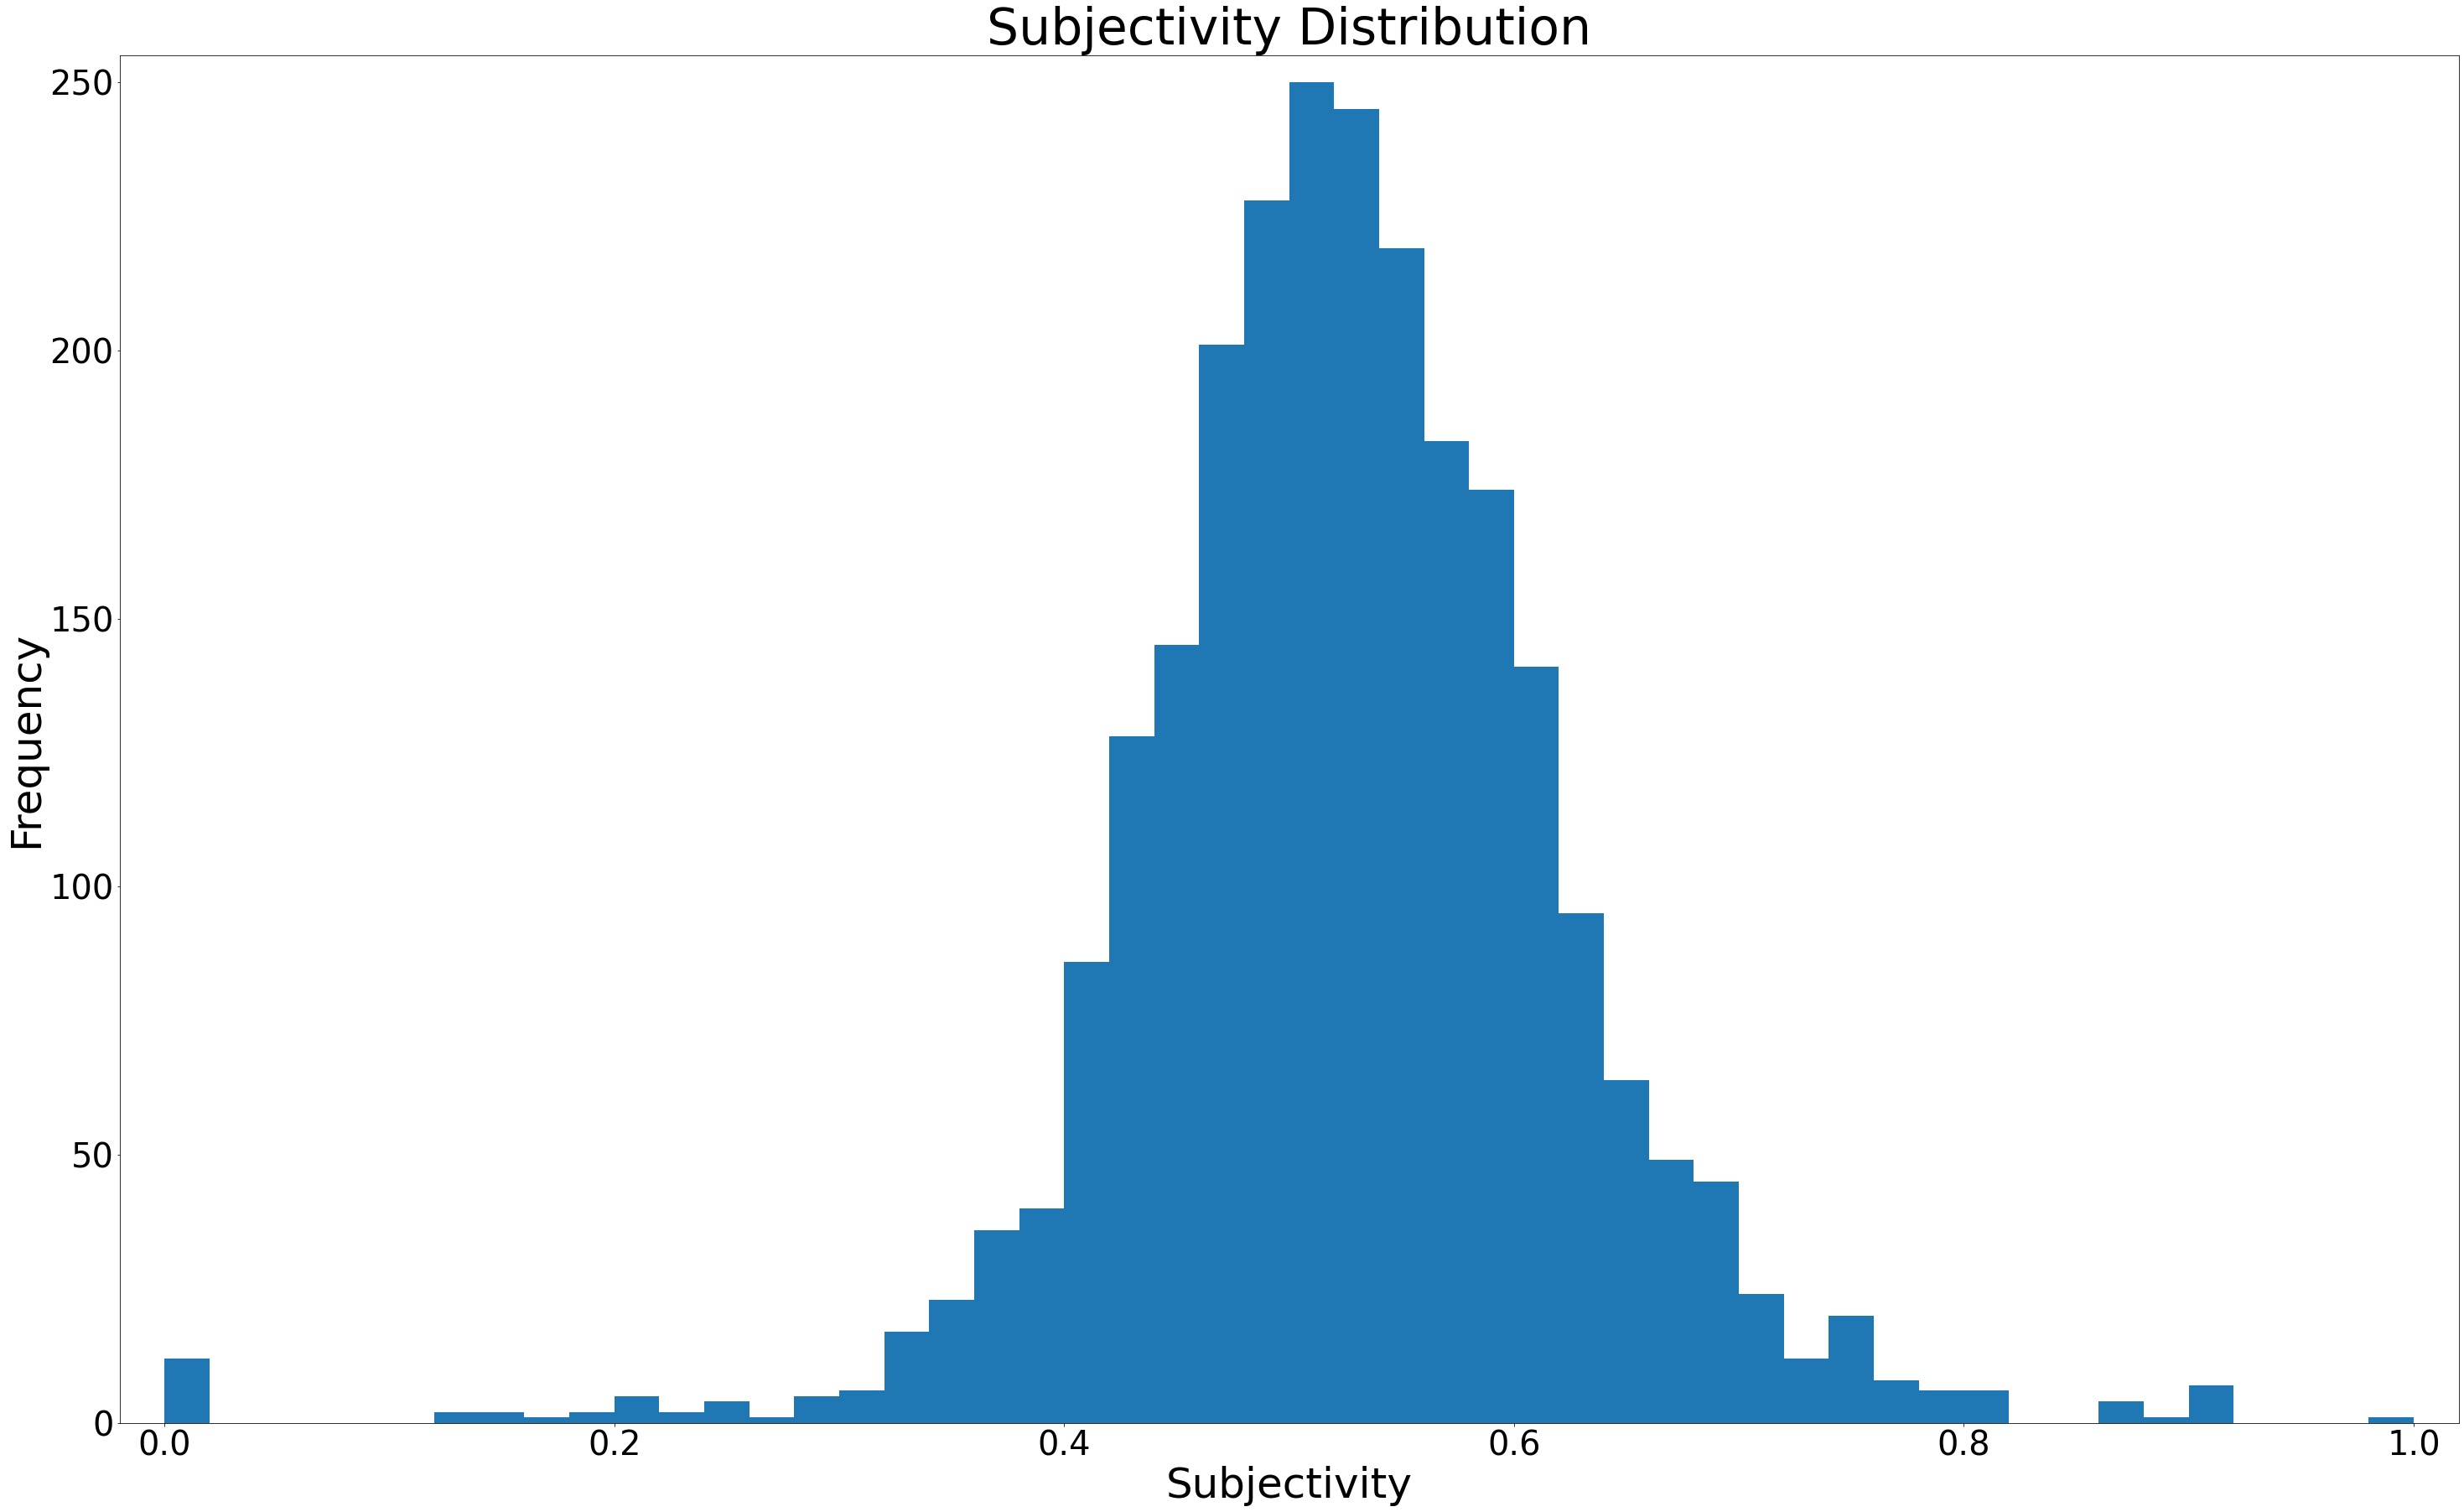

In [ ]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Subjectivity', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(CleanDF['Subjectivity_score'], bins=50)
plt.title('Subjectivity Distribution', fontsize=60)
plt.show()

### 30 Most Common Adjectives for Negative Sentiment


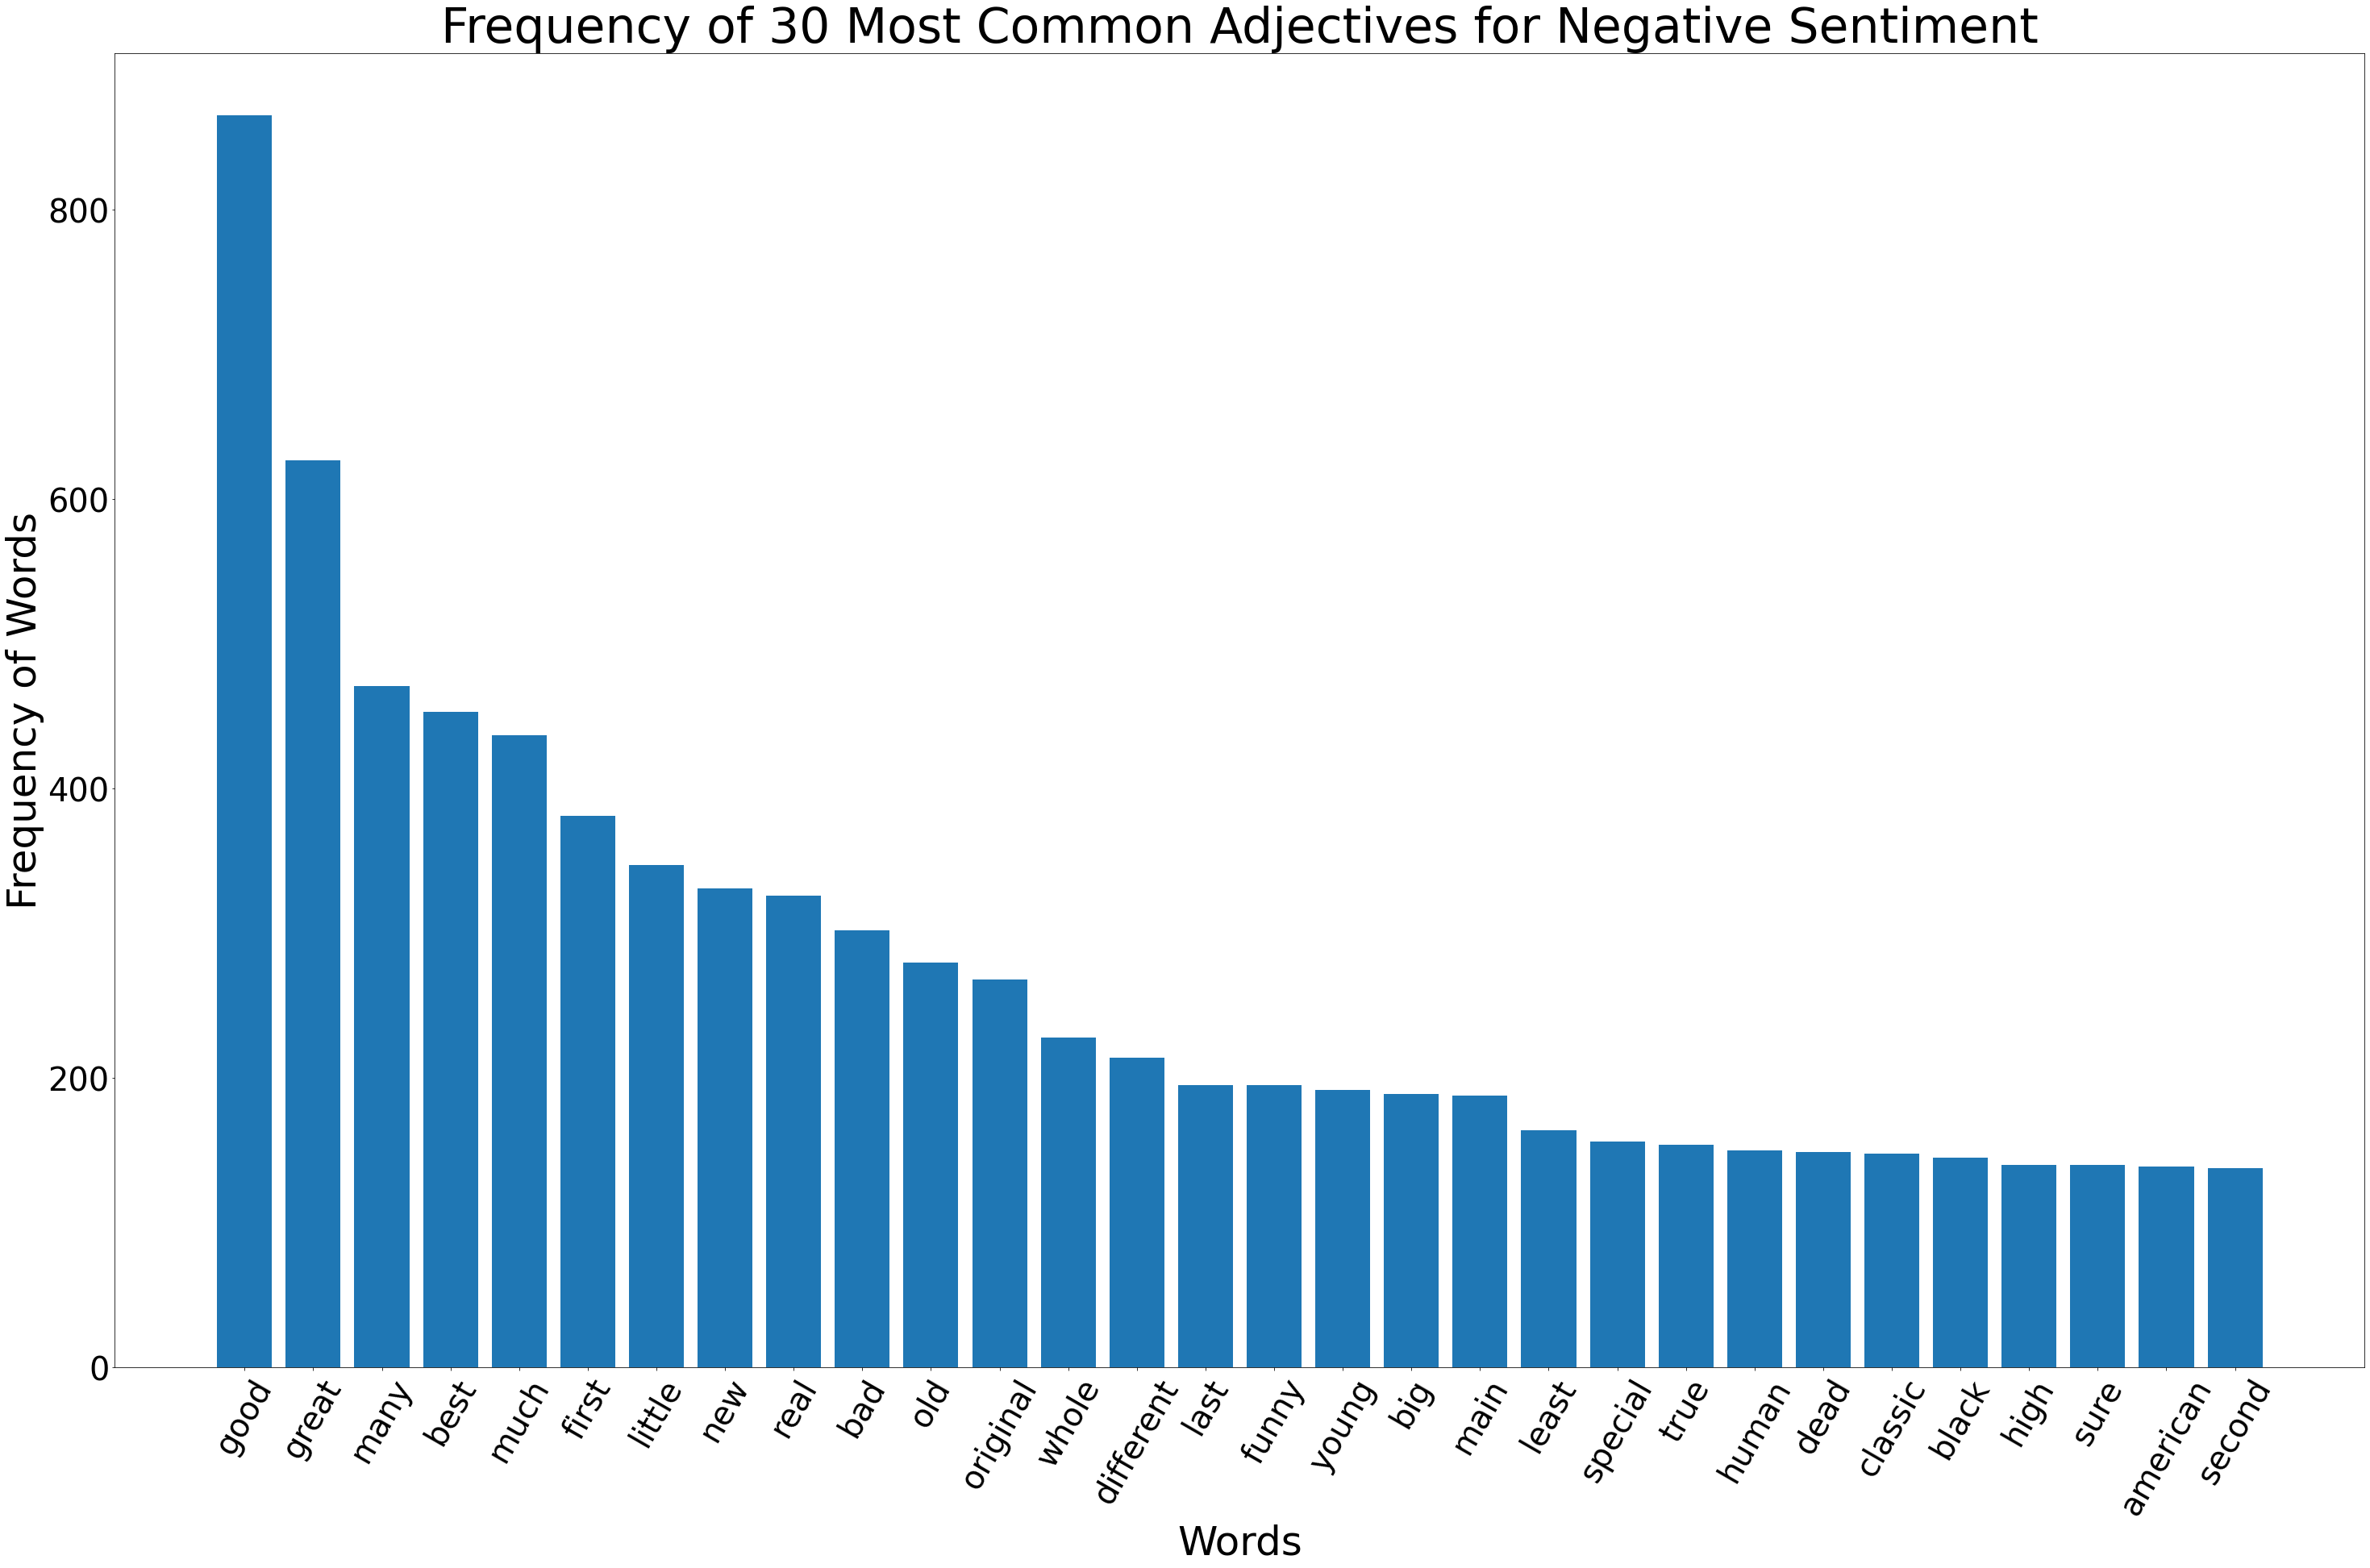

In [ ]:
from collections import Counter
group_by = CleanDF.groupby('Sentiment')['Adjective_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(30))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 30 Most Common Adjectives for Negative Sentiment', fontsize=60)
plt.show()

### 30 Most Common Adjectives for Positive Sentiment

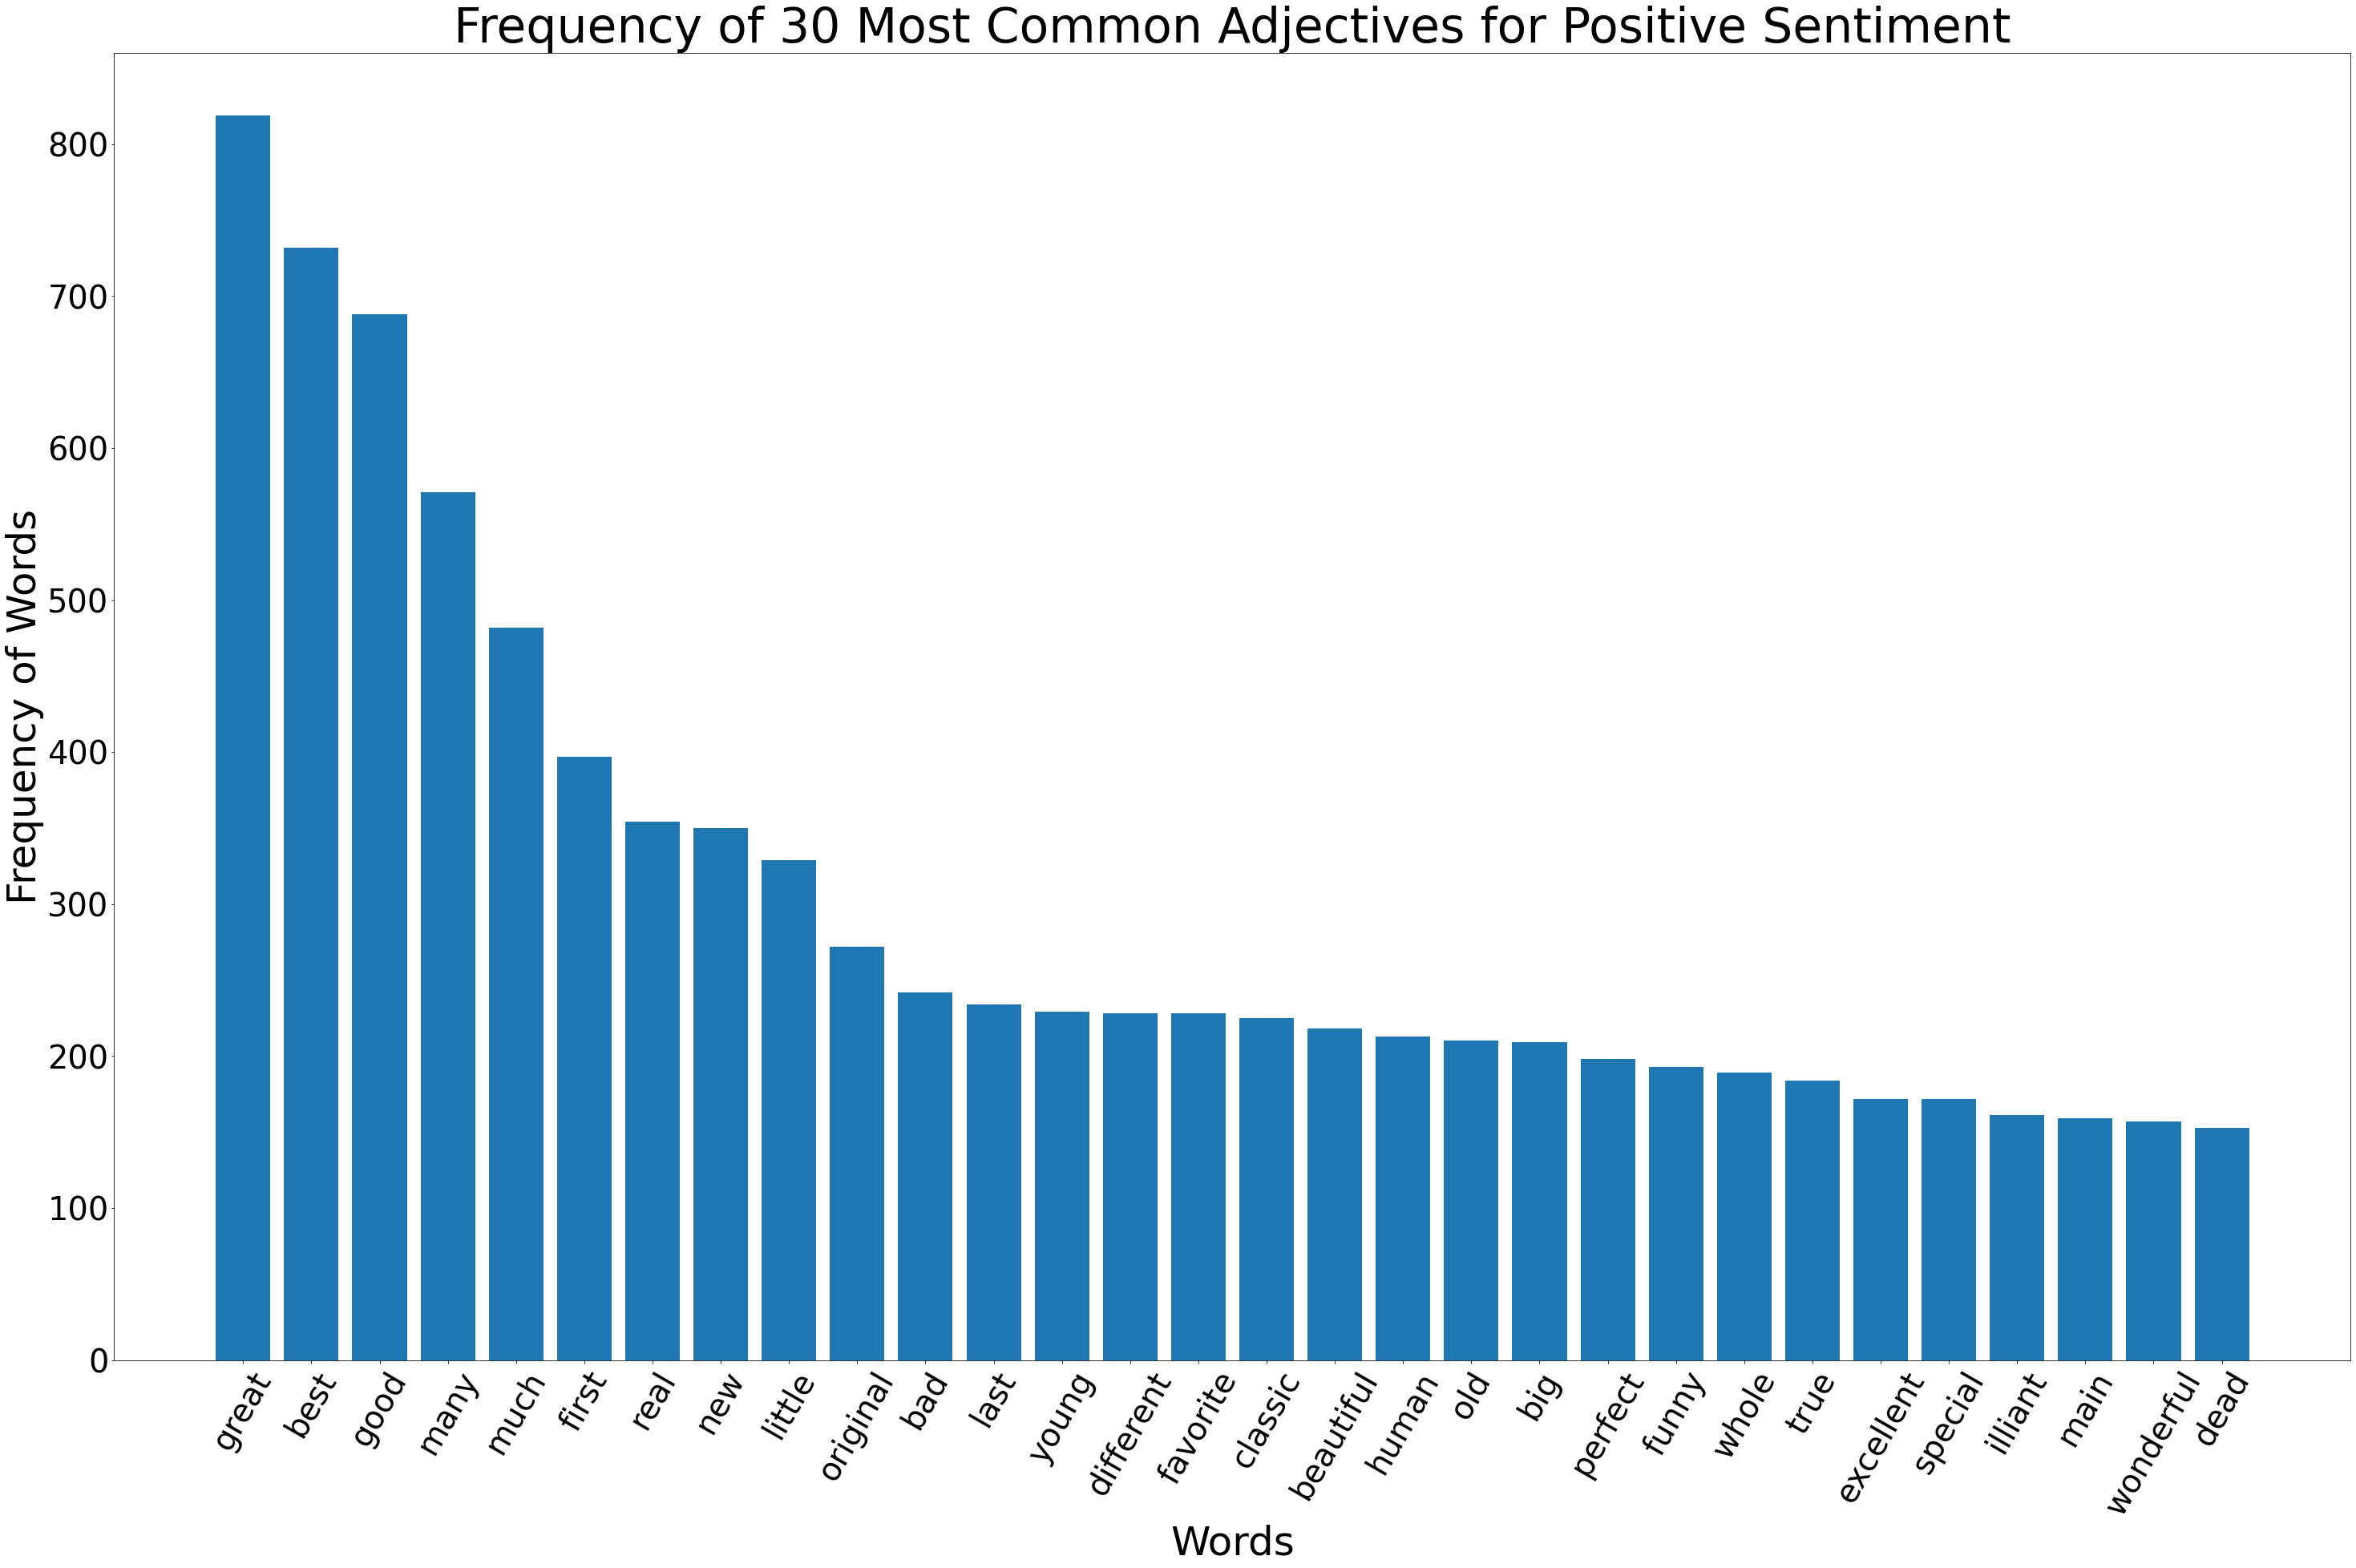

In [ ]:
from collections import Counter
group_by = CleanDF.groupby('Sentiment')['Adjective_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(30))
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 30 Most Common Adjectives for Positive Sentiment', fontsize=60)
plt.show()

### Word Cloud

In [ ]:
words = CleanDF['Adjective']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['tier', 'finish', 'edge', 'recommendhighest', 'put', 'future', 'shamequality', 'actingexcellent', 'tough', 'dark', 'past', 'twisted', 'evil', 'unapologetic', 'void', 'moral', 'edit', 'intangiblesexcellent', 'visual', 'gloomy', 'good', 'next', 'intense', 'best', 'phenomenal', 'lotr', 'large', 'cinematic', 'write', 'single', 'chronological', 'quality', 'high', 'consistent', 'art', 'beatwhich', 'favorite', '\x96', 'true', 'want', 'whole', 'intense', 'evocative', 'thoughtful', 'golem', 'greatest', 'middle', 'deadly', 'last', 'entire', 'previous', 'filmsthe', 'major', 'classic', 'able', 'guess', 'fatalistic', 'unpredictable', 'tolkien', 'grand', 'present', 'major', 'tolkien', 'subtle', 'previous', 'simple', 'consistent', 'tolkien', 'better', 'lengthy', 'changed', 'early', 'important', 'least', 'illustrated', 'lord', 'close', 'incredible', 'light', 'miss', 'good', 'old', 'best', 'middle', 'central', 'steal', 'private', 'new', 'nolan', 'fame', 'smart', 'unfortunately', 'failurethe', 'lengthy

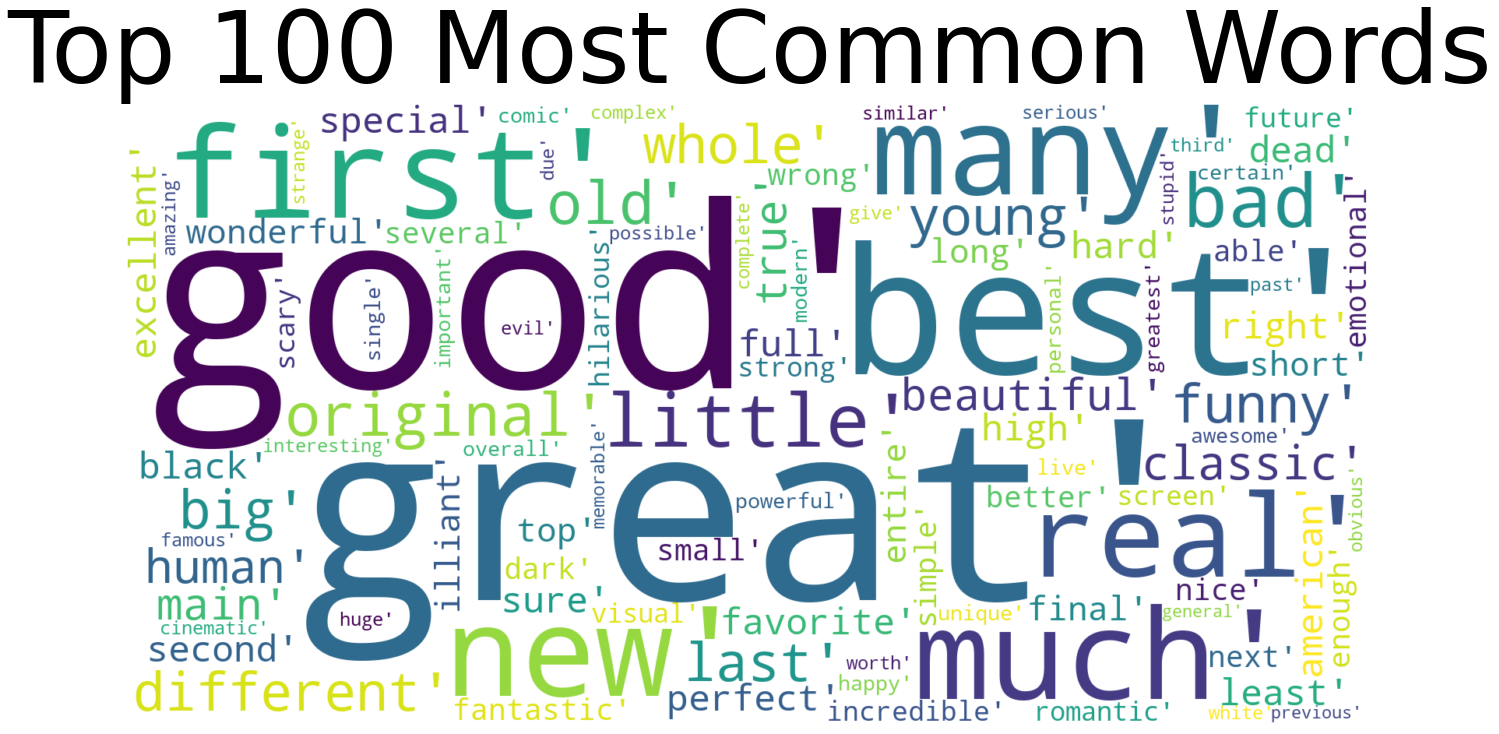

In [ ]:
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

## Genre-Based EDA

### 30 Most Common Adjectives for Action genre

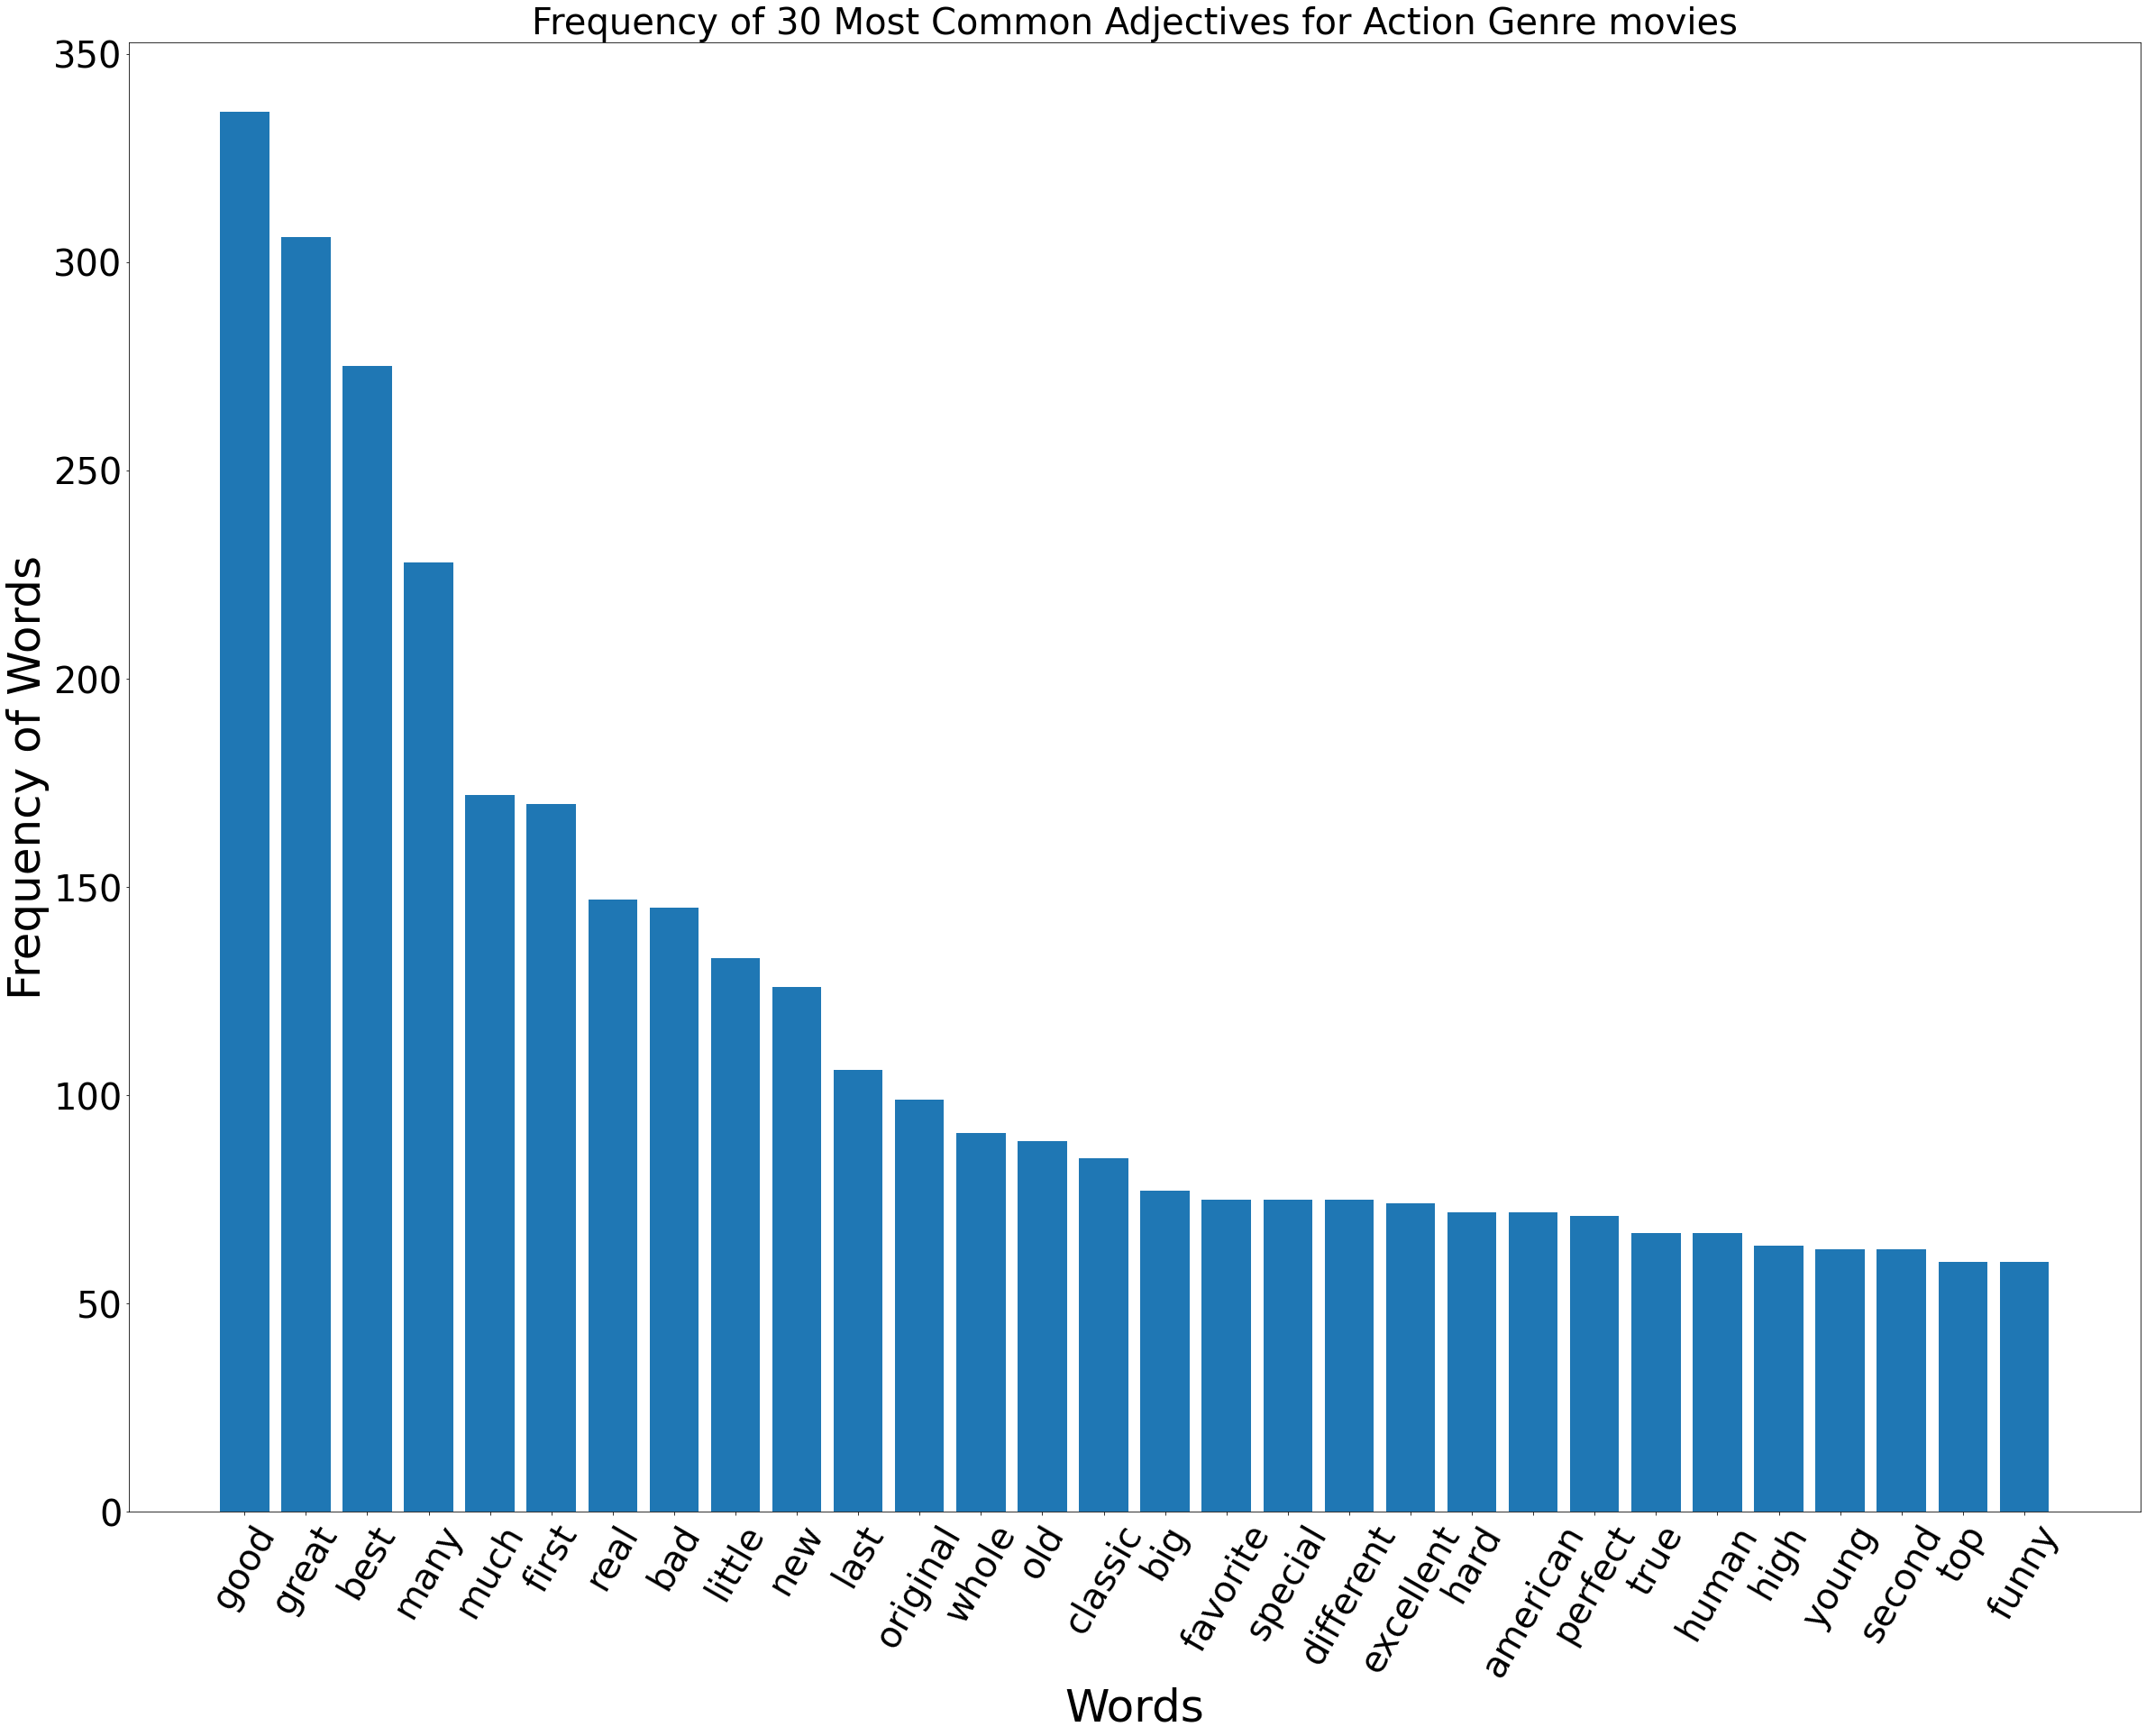

In [ ]:
from collections import Counter
group_by_Genre = CleanDF.groupby('Genre')['Adjective_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(30))
group_by_Action = group_by_Genre.iloc[0]
words_Action = list(zip(*group_by_Action))[0]
freq_Action = list(zip(*group_by_Action))[1]
plt.figure(figsize=(40,30))
plt.bar(words_Action, freq_Action)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 30 Most Common Adjectives for Action Genre movies', fontsize=40)
plt.show()

### 30 Most Common Adjectives for Comedy genre

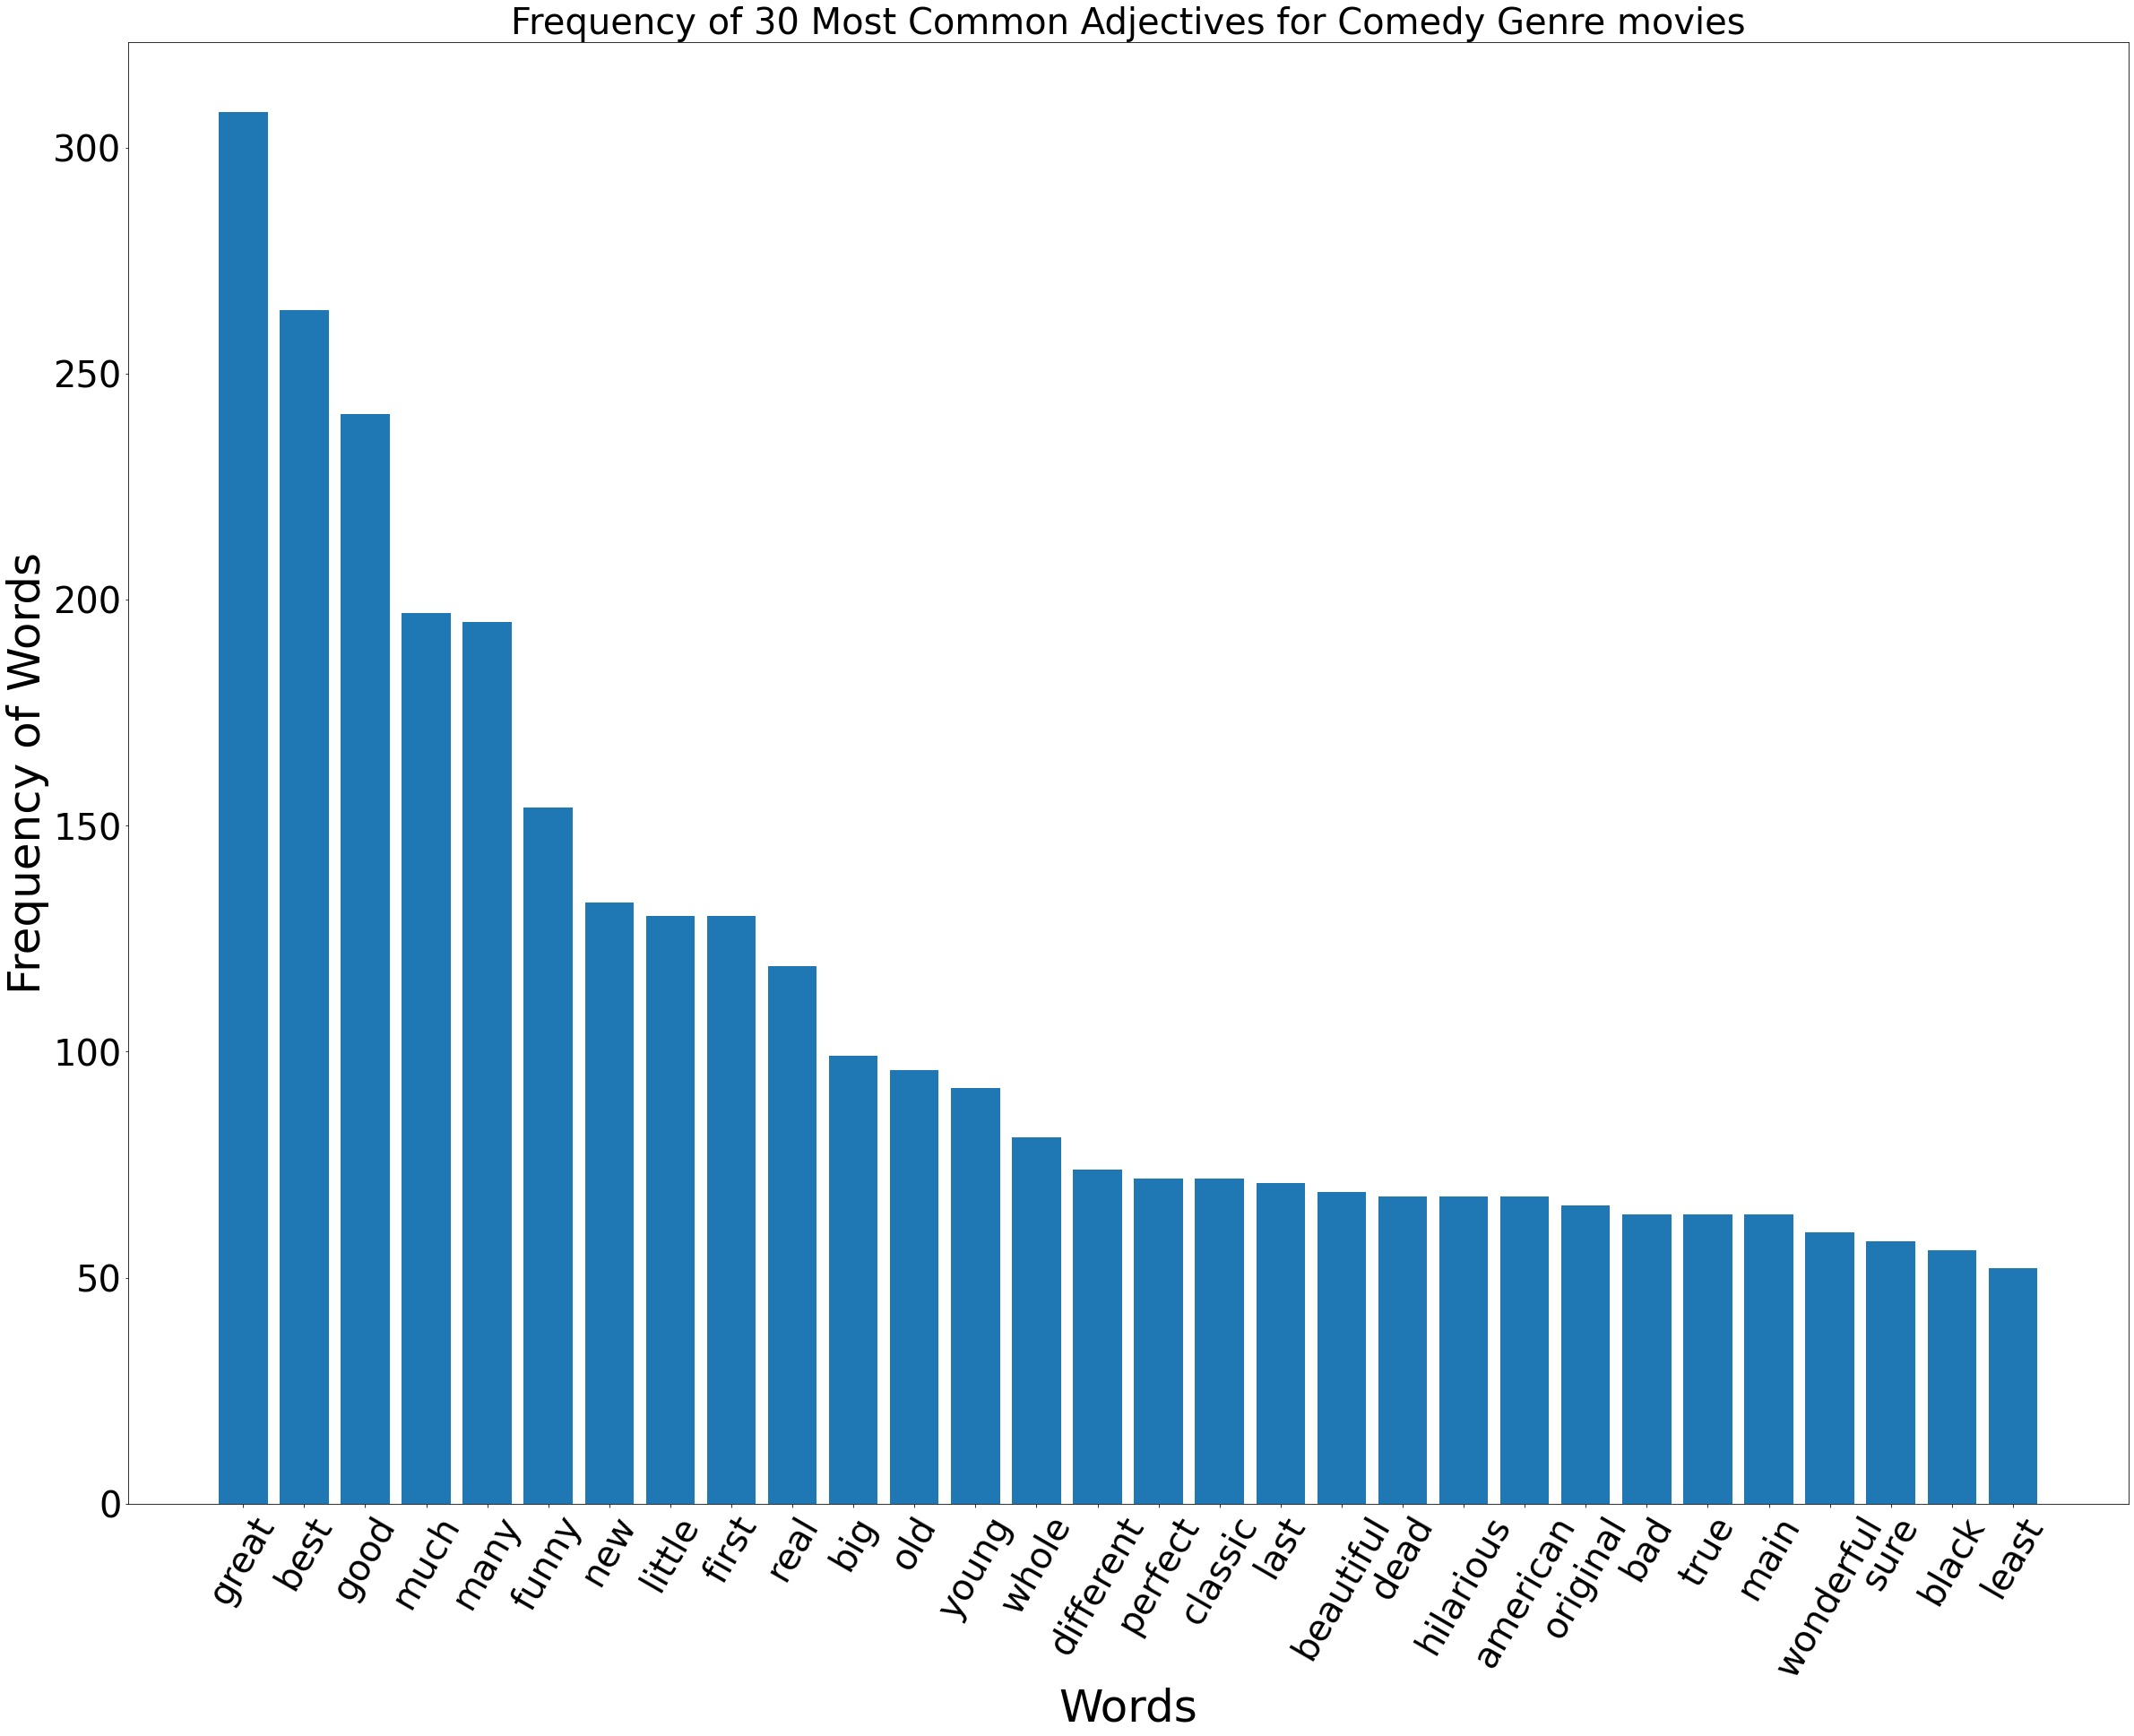

In [ ]:
group_by_Comedy = group_by_Genre.iloc[1]
words_Comedy = list(zip(*group_by_Comedy))[0]
freq_Comedy = list(zip(*group_by_Comedy))[1]
plt.figure(figsize=(40,30))
plt.bar(words_Comedy, freq_Comedy)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 30 Most Common Adjectives for Comedy Genre movies', fontsize=40)
plt.show()

### 30 Most Common Adjectives for Horror genre

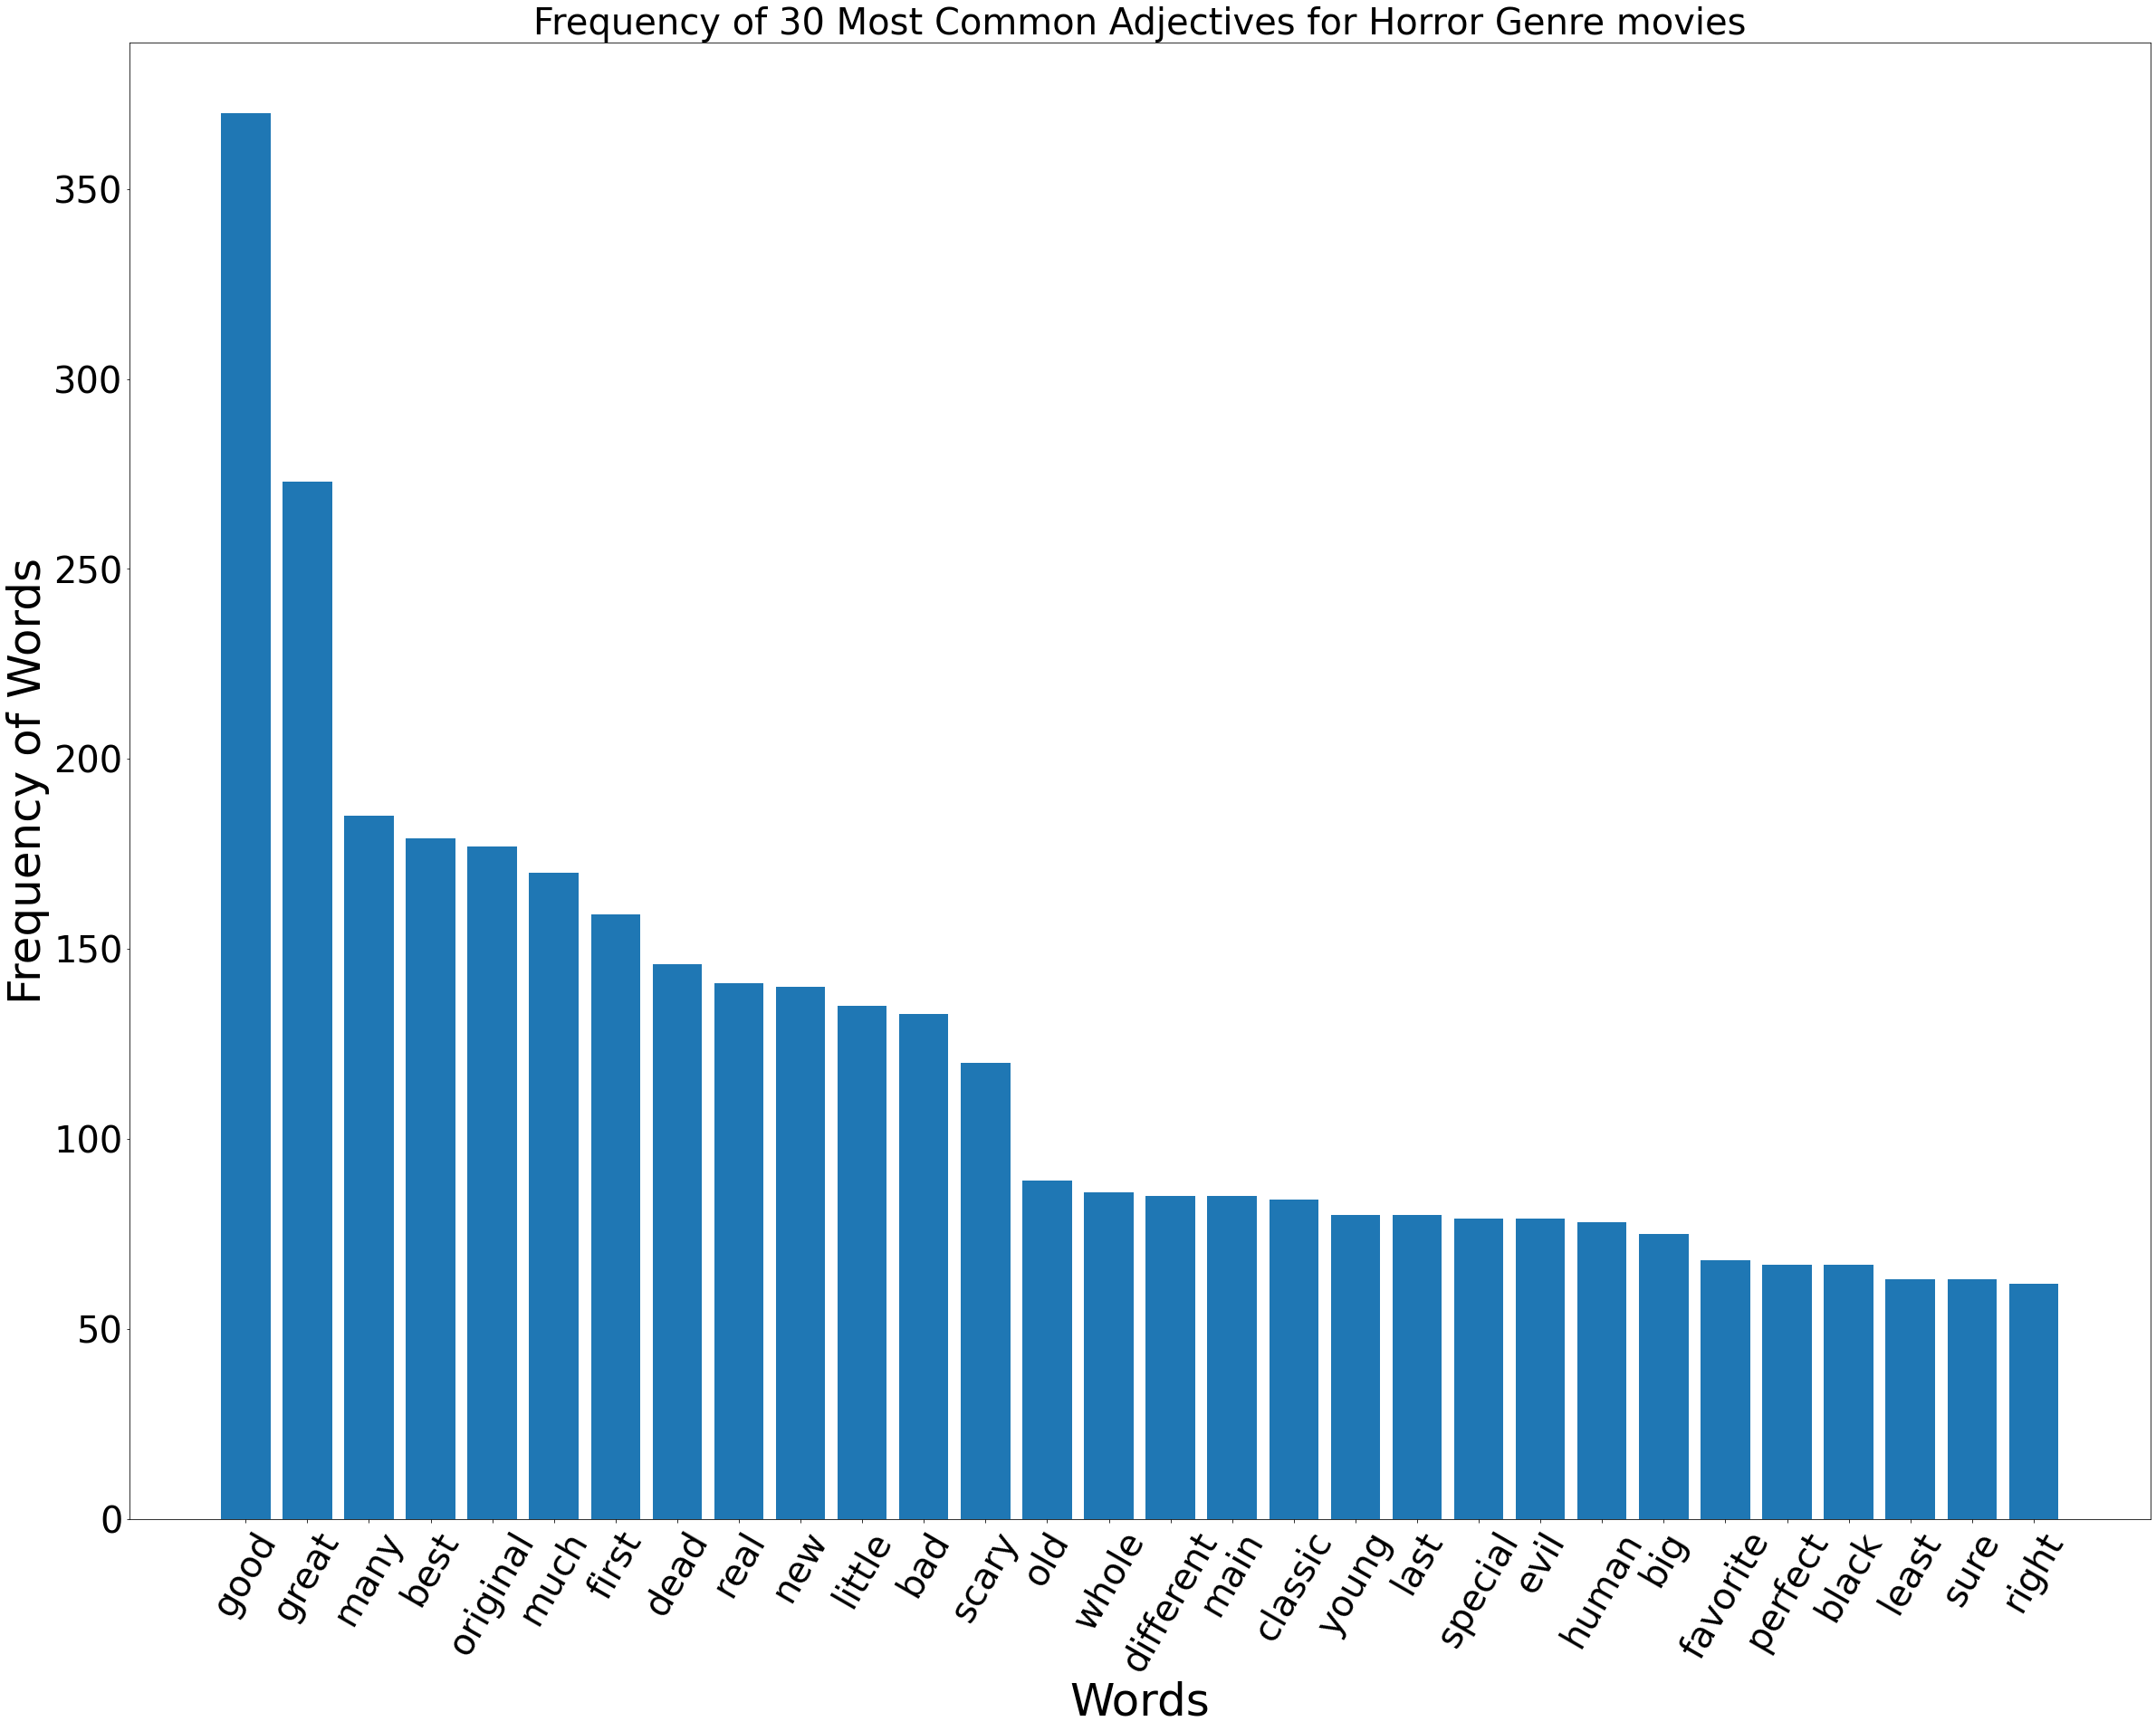

In [ ]:
group_by_Horror = group_by_Genre.iloc[2]
words_Horror = list(zip(*group_by_Horror))[0]
freq_Horror = list(zip(*group_by_Horror))[1]
plt.figure(figsize=(40,30))
plt.bar(words_Horror, freq_Horror)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 30 Most Common Adjectives for Horror Genre movies', fontsize=40)
plt.show()

### 30 Most Common Adjectives for Romance genre

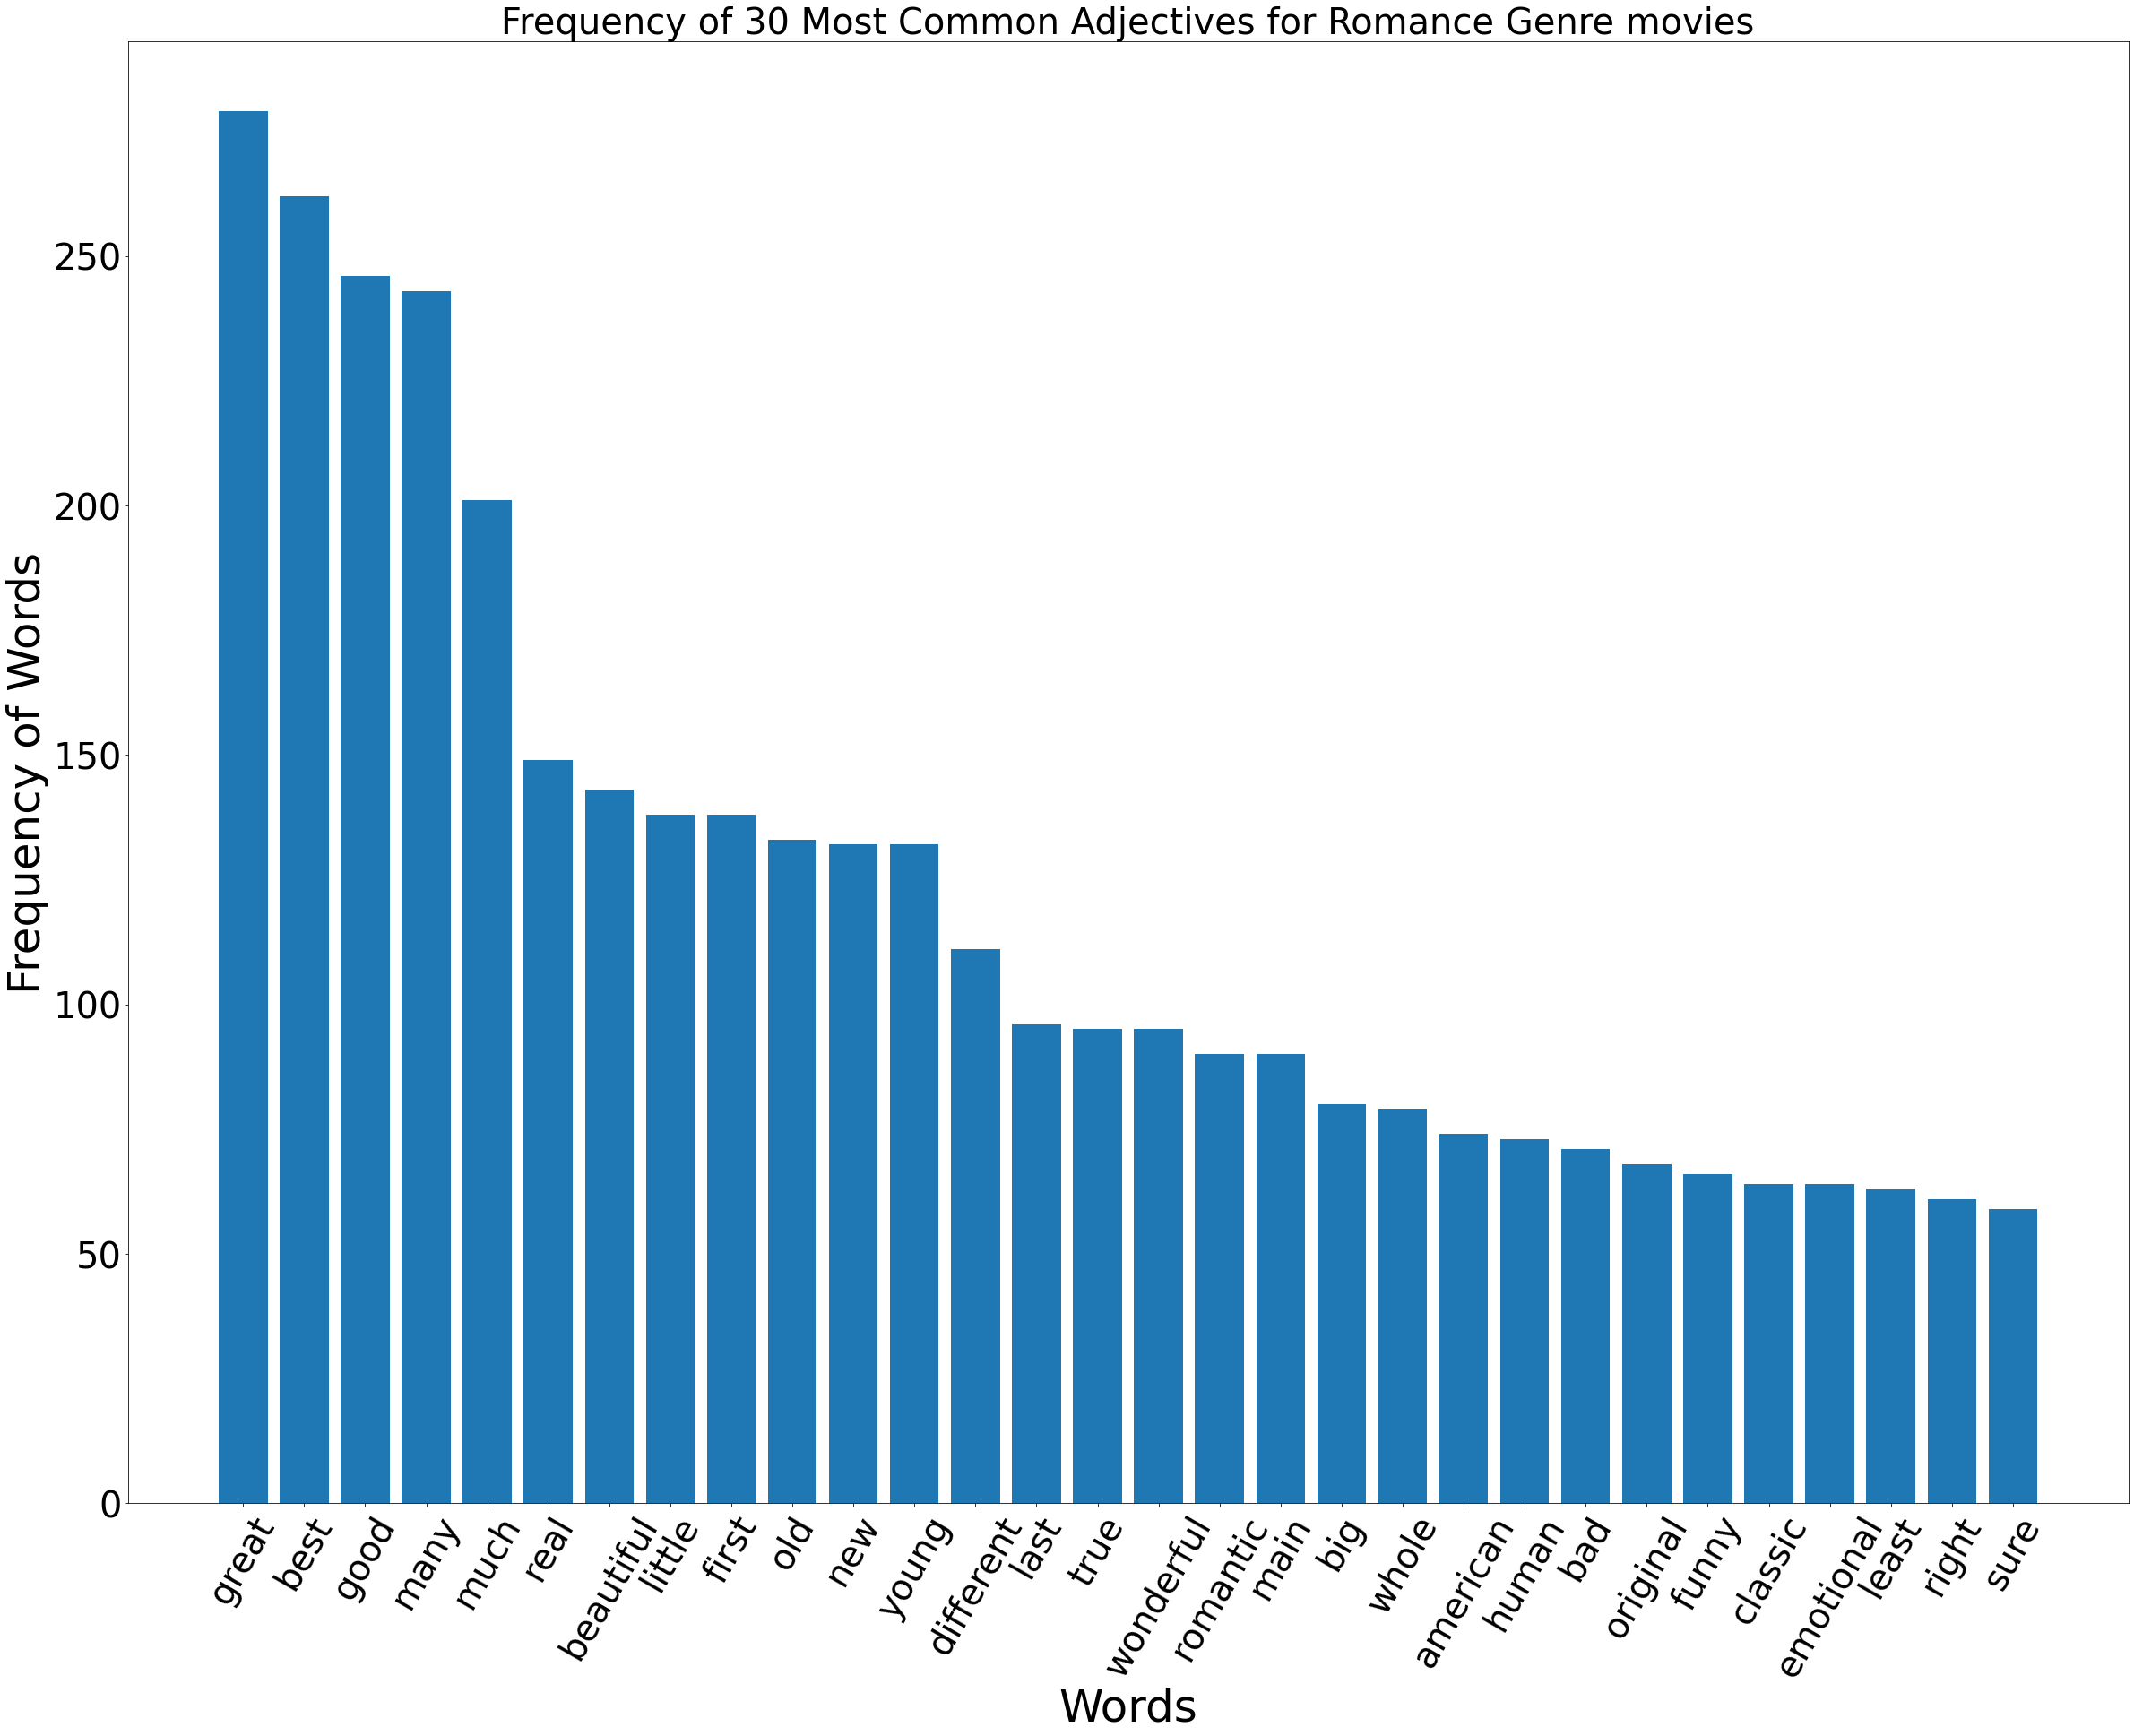

In [ ]:
group_by_Romance = group_by_Genre.iloc[3]
words_Romance = list(zip(*group_by_Romance))[0]
freq_Romance = list(zip(*group_by_Romance))[1]
plt.figure(figsize=(40,30))
plt.bar(words_Romance, freq_Romance)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 30 Most Common Adjectives for Romance Genre movies', fontsize=40)
plt.show()

### 30 Most Common Adjectives for Sci-fi genre

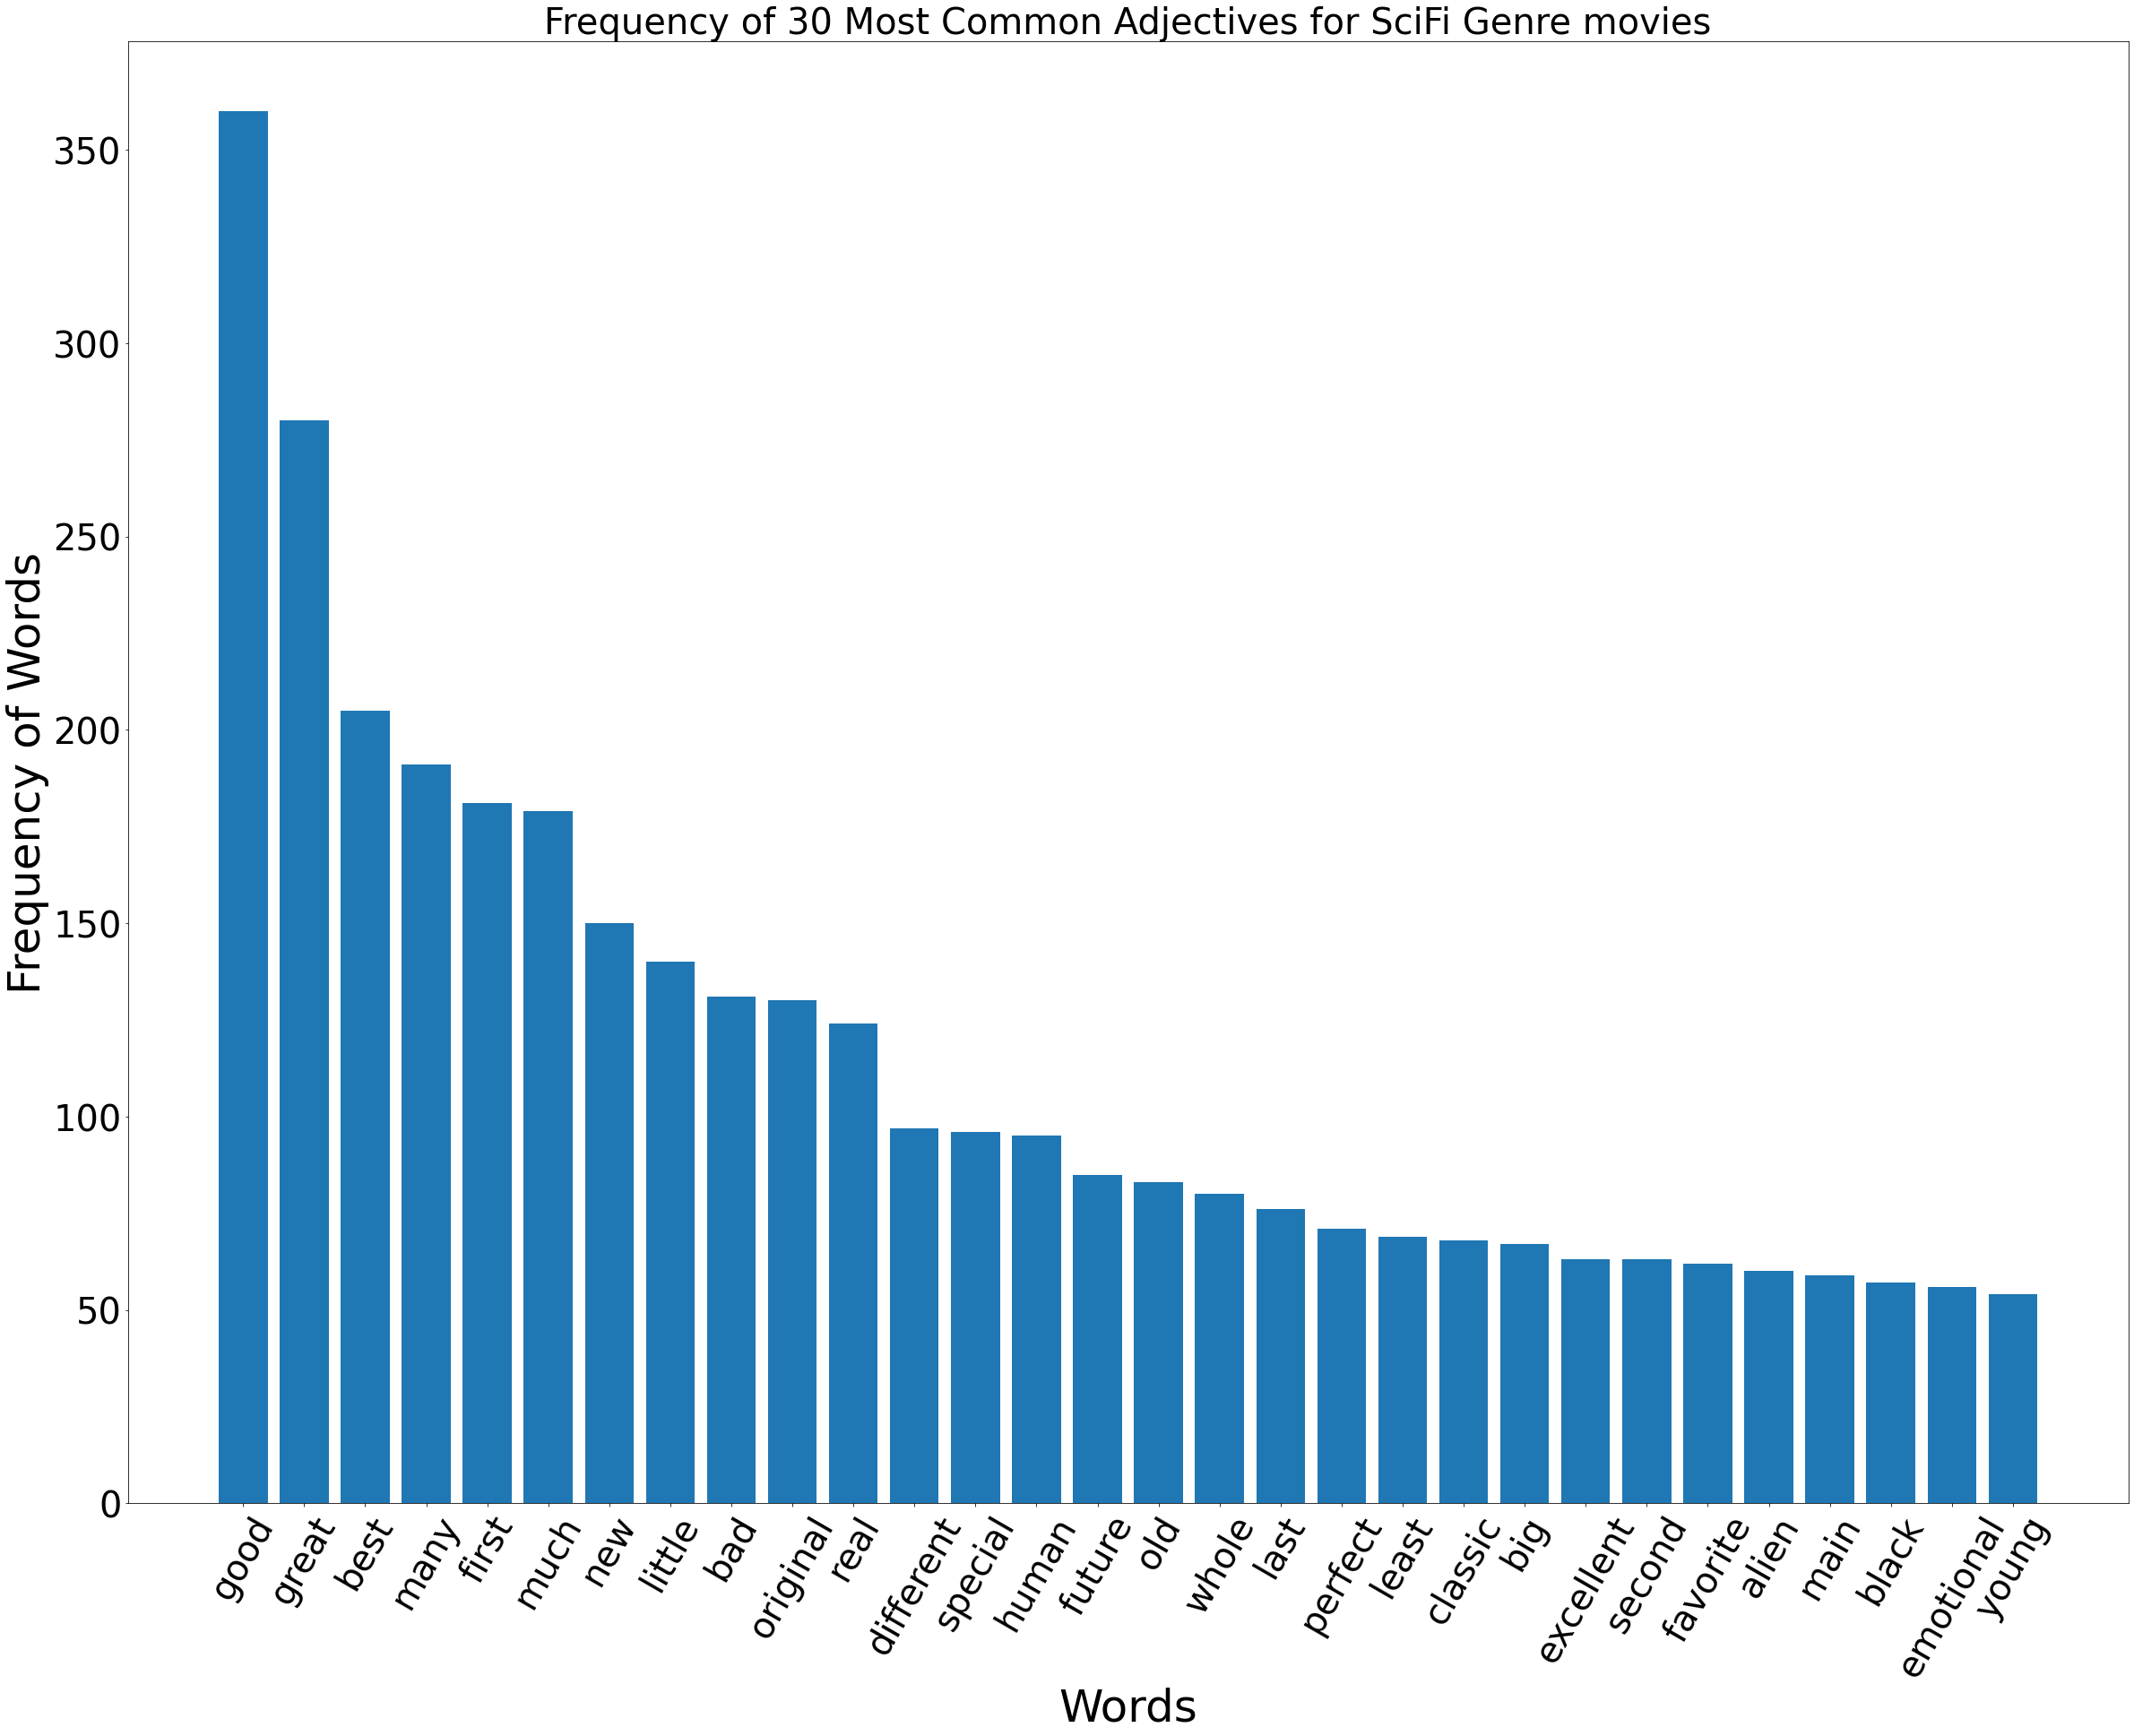

In [ ]:
group_by_SciFi = group_by_Genre.iloc[4]
words_SciFi = list(zip(*group_by_SciFi))[0]
freq_SciFi = list(zip(*group_by_SciFi))[1]
plt.figure(figsize=(40,30))
plt.bar(words_SciFi, freq_SciFi)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 30 Most Common Adjectives for SciFi Genre movies', fontsize=40)
plt.show()

## Aspect-Based EDA

### Lexicon based (Spacy)

In [40]:
# !python -m spacy download en_core_web_lg
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [43]:
import spacy
import os
import collections

# call model
ner = spacy.load("en_core_web_sm")
# ner=en_core_web_lg.load()
## tag text and exctract tags into a list
CleanDF["Tags"] = CleanDF["Lemma_str"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
CleanDF["Tags"] = CleanDF["Tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in CleanDF["Tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     CleanDF["Tags_"+feature] = CleanDF["Tags"].apply(lambda x: 
                             utils_ner_features(x, feature))

## print result
CleanDF.head()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

Movie  ... Tags_ORG
0                                The Dark Knight  ...        0
1                                The Dark Knight  ...        0
2  The Lord of the Rings: The Return of the King  ...        2
3  The Lord of the Rings: The Return of the King  ...        0
4                                      Inception  ...        1

[5 rows x 36 columns]

#### Action movie

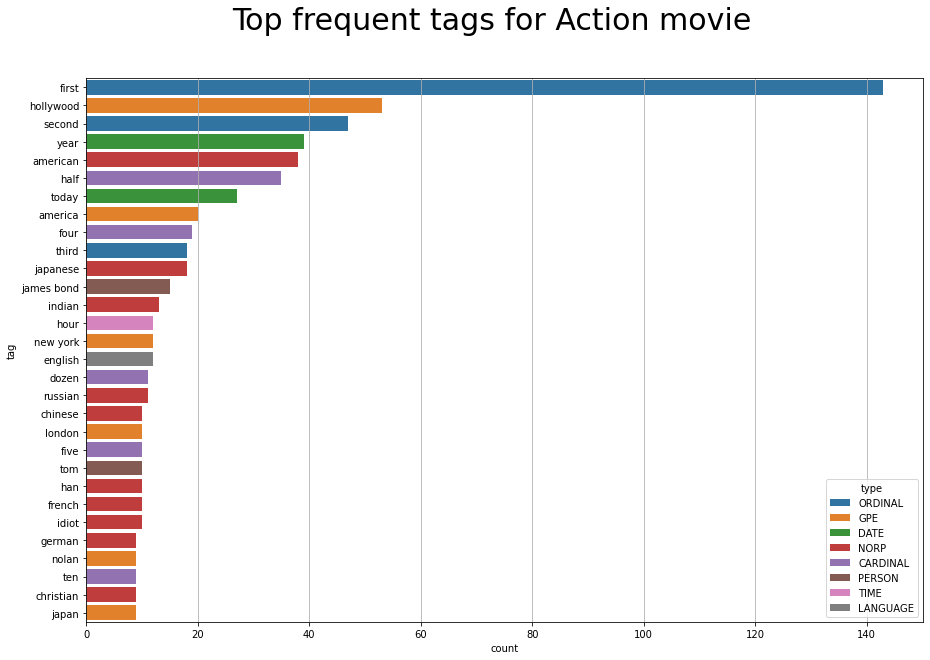

In [44]:
import seaborn as sns
import numpy as np

Genre = "Action"
 
tags_list = CleanDF[CleanDF["Genre"]==Genre]["Tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type','tag']).count().reset_index().sort_values("count", ascending=False)

fig, ax = plt.subplots(figsize=(15,10))
# plt.figure(figsize=(40,30))
fig.suptitle("Top frequent tags for Action movie", fontsize=30)
sns.barplot(x="count", y="tag", hue="type", data=dtf_tags[:30], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

#### Comedy movie

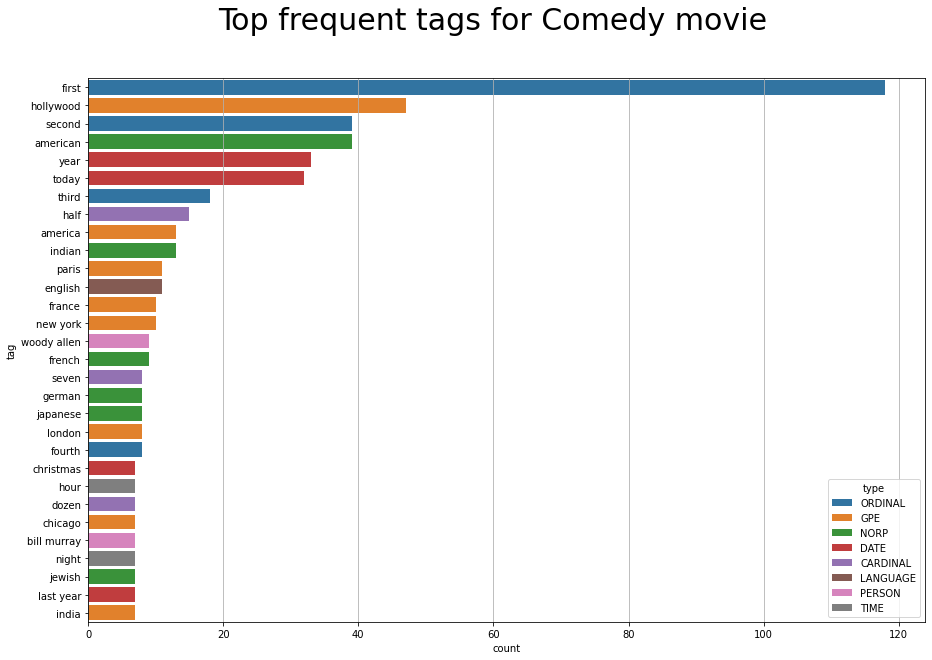

In [45]:
Genre = "Comedy"
 
tags_list = CleanDF[CleanDF["Genre"]==Genre]["Tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type','tag']).count().reset_index().sort_values("count", ascending=False)

fig, ax = plt.subplots(figsize=(15,10))
# plt.figure(figsize=(40,30))
fig.suptitle("Top frequent tags for Comedy movie", fontsize=30)
sns.barplot(x="count", y="tag", hue="type", data=dtf_tags[:30], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

#### Horror movie

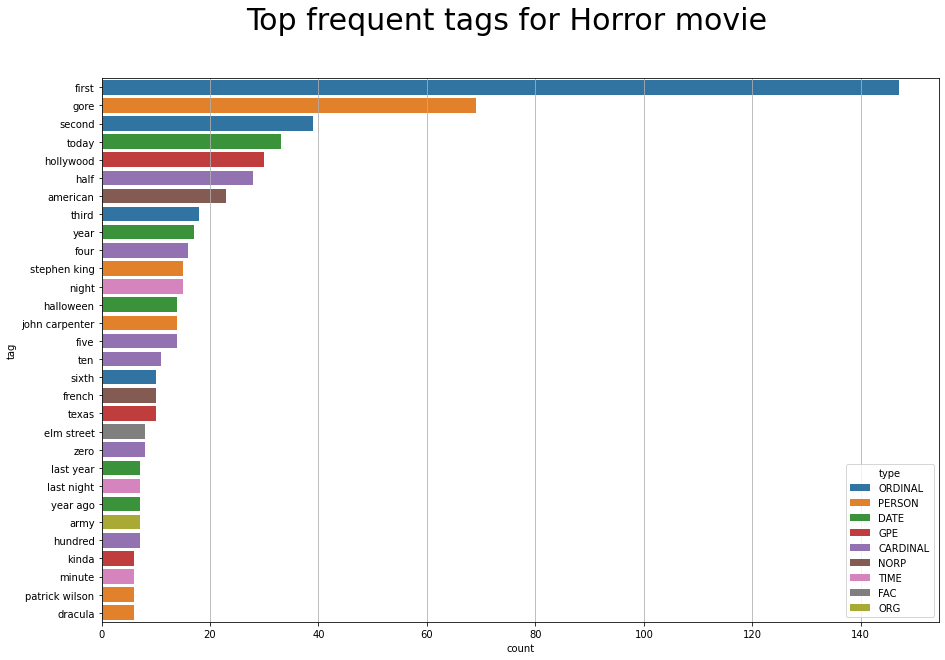

In [46]:
Genre = "Horror"
 
tags_list = CleanDF[CleanDF["Genre"]==Genre]["Tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type','tag']).count().reset_index().sort_values("count", ascending=False)

fig, ax = plt.subplots(figsize=(15,10))
# plt.figure(figsize=(40,30))
fig.suptitle("Top frequent tags for Horror movie", fontsize=30)
sns.barplot(x="count", y="tag", hue="type", data=dtf_tags[:30], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

#### Romance movie

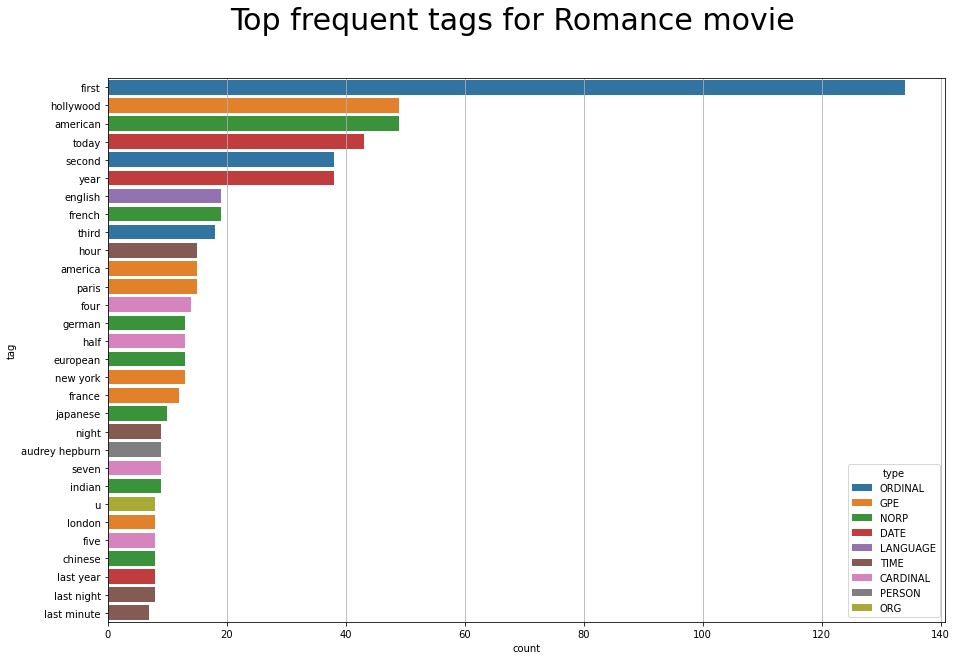

In [47]:
Genre = "Romance"
 
tags_list = CleanDF[CleanDF["Genre"]==Genre]["Tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type','tag']).count().reset_index().sort_values("count", ascending=False)

fig, ax = plt.subplots(figsize=(15,10))
# plt.figure(figsize=(40,30))
fig.suptitle("Top frequent tags for Romance movie", fontsize=30)
sns.barplot(x="count", y="tag", hue="type", data=dtf_tags[:30], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

#### Sci-Fi movie

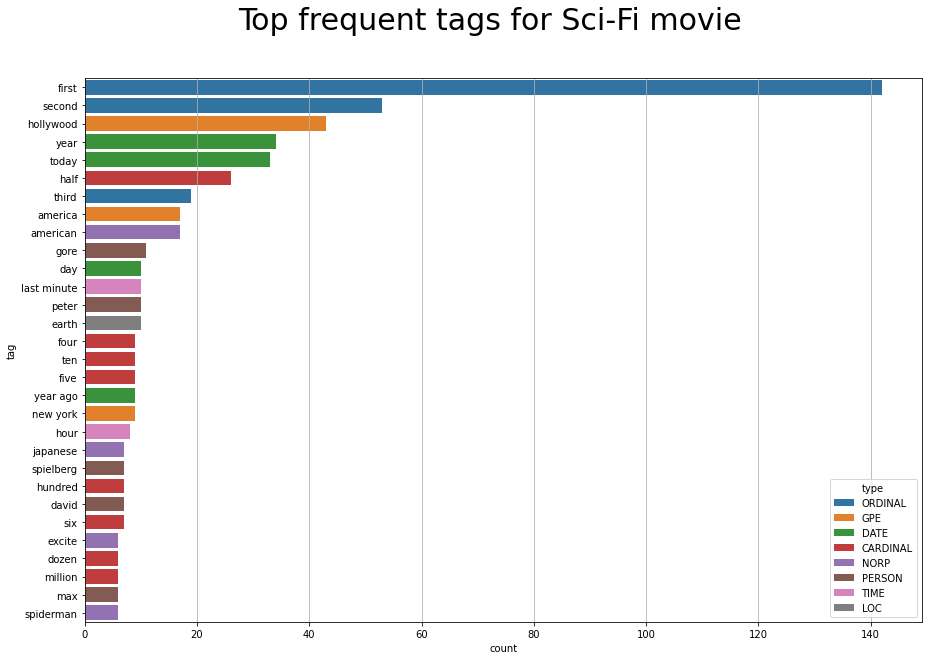

In [48]:
Genre = "Sci-Fi"
 
tags_list = CleanDF[CleanDF["Genre"]==Genre]["Tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type','tag']).count().reset_index().sort_values("count", ascending=False)

fig, ax = plt.subplots(figsize=(15,10))
# plt.figure(figsize=(40,30))
fig.suptitle("Top frequent tags for Sci-Fi movie", fontsize=30)
sns.barplot(x="count", y="tag", hue="type", data=dtf_tags[:30], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

## Latent Dirichlet Allocation (LDA) 

In [1]:
from gensim.corpora import Dictionary
import pickle
import pandas as pd
import pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis

import matplotlib.pyplot as plt 
import pandas as pd

pickle_in=open('/Users/boyun/Desktop/SMU/Files/'+"CleanDF",'rb')
CleanDF=pd.read_pickle(pickle_in)
CleanDF['Lemma_str'] = CleanDF['Lemma_str'].str.replace('one', '')
CleanDF['Lemma_str'] = CleanDF['Lemma_str'].str.replace('two', '')
CleanDF['Lemma_str'] = CleanDF['Lemma_str'].str.replace('three', '')
CleanDF.head()

# Lemmatized
import gensim.corpora as corpora

# Create Dictionary
dictionary = corpora.Dictionary(CleanDF['Lemmatized'])

# Create Corpus
texts = CleanDF['Lemmatized']

# Term Document Frequency
doc_term_matrix = [dictionary.doc2bow(text) for text in texts]

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/h5py/__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


In [2]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis

import matplotlib.pyplot as plt 
import pandas as pd

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=3, random_state=100,
                chunksize=1000, passes=50)

lda_model.print_topics()

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.022*"film" + 0.008*"character" + 0.008*"one" + 0.007*"like" + 0.006*"make" + 0.006*"see" + 0.005*"story" + 0.005*"well" + 0.005*"get" + 0.005*"great"'),
 (1,
  '0.016*"film" + 0.009*"one" + 0.008*"time" + 0.006*"make" + 0.005*"like" + 0.004*"character" + 0.004*"action" + 0.004*"see" + 0.004*"good" + 0.004*"get"'),
 (2,
  '0.014*"film" + 0.008*"one" + 0.007*"make" + 0.007*"see" + 0.006*"like" + 0.006*"time" + 0.006*"get" + 0.006*"go" + 0.005*"would" + 0.005*"people"')]

In [3]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.046176  0.050420       1        1  41.983707
2     -0.028785 -0.058871       2        1  35.575920
1      0.074961  0.008452       3        1  22.440373, topic_info=        Term         Freq        Total Category  logprob  loglift
1050   alien   287.000000   287.000000  Default  30.0000  30.0000
245     time  2311.000000  2311.000000  Default  29.0000  29.0000
797   action   988.000000   988.000000  Default  28.0000  28.0000
2879    ship   150.000000   150.000000  Default  27.0000  27.0000
42       one  3293.000000  3293.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
259      way   234.639104  1236.028252   Topic3  -5.9677  -0.1673
572     much   234.704234  1273.818623   Topic3  -5.9675  -0.1971
71     watch   222.773475  1399.282316   Topic3  -6.0196  -0.3433
362   people   210.522976  1282.616216   Topic3  -6.0762  -0.3128
212   really   208.684278  1382.100204   Topic3  -6.0850  -0.3962

[282 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
16798      2  0.995294     abe
81         1  0.550522     act
81         2  0.305681     act
81         3  0.143937     act
797        1  0.468481  action
...      ...       ...     ...
7607       1  0.036007  zombie
7607       2  0.360073  zombie
7607       3  0.606124  zombie
266        1  0.173064       
266        2  0.824113       

[407 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])